In [ ]:
#Importamos los modulos necesarios para estas sección
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
#Funciones Auxiliares
def cross_grafica(df,variable,variable_tgt):
  v_variables_new_by_loan_status = pd.crosstab(df[variable],df[variable_tgt])
  v_variables_new_by_loan_status_index = list(v_variables_new_by_loan_status.index)
  #valores
  malos = list(v_variables_new_by_loan_status.iloc[:,0])  
  buenos = list(v_variables_new_by_loan_status.iloc[:,1])

#Configuraciones de la grafica
  plt.figure(figsize=(16,9))
## Se crean las primeras barras
  plt.bar(v_variables_new_by_loan_status_index, malos, label='0', color = "darkorange")
  
## Se crean las segundas barras y se apilan sobre las primeras
  plt.bar(v_variables_new_by_loan_status_index, buenos, label='1',  bottom=malos,color='limegreen')
  plt.xticks(v_variables_new_by_loan_status_index, v_variables_new_by_loan_status_index) #indice y grupos en este caso es lo mismo (indice el numero de grupos y grupos las etiquetas)
  plt.ylabel("Frecuency")
  plt.xlabel(variable)
  plt.title(variable + '_' + variable_tgt)
  plt.legend()
  # plt.savefig(v_variables_new[i]+".png")
  plt.show()

# Limpieza de los Datos

In [ ]:
#Leemos la primer tabla
data_hist = pd.read_csv('TU_CX_DATACHALLENGE_BD_HISTORICA.csv')
data_hist

,FH_CORTE,NU_CTE,IM_NOMINA_MES,TO_DISPERSIONES_MES,NU_VINCULACION,NU_FAM_CRED_CONS,NU_FAM_PZO_BASICO,NU_FAM_CRED_REV,NU_FAM_FON_CORTO,NU_FAM_MD,NU_FAM_SEG_PATR,NU_FAM_DOM_TDC,NU_FAM_CANALES,NU_FAM_FON_COBRV,NU_FAM_NOMINA,NU_FAM_FON_DIVER,NU_FAM_FON_LARGO,NU_FAM_SEG_PERS,NU_FAM_DOM_SERV,NU_FAM_CRED_AUTO,NU_FAM_VISTA_ME,NU_FAM_COBR_DOC,NU_FAM_BMOVIL,NU_FAM_CRED_HIPO,NU_FAM_VISTA_MN,NU_FAM_PZO_DIVER,NU_FAM_MC,NU_FAM_TDC_PAT,TRANS_SPEI,IM_TRANS_SPEI,IM_COMISIONES,NB_SEG_NVA_RED_BMR,CD_ACT_CTE,TO_CTA_CAPTACION,IM_SDO_MEDIO_CAP,TO_CTA_PREST,IM_SDO_VIGENTE_PREST,IM_SDO_VENCIDO_PREST,UUT_GLOMO_BMOVIL,IX_MOROSIDAD_PRESTAMOS,IX_C_VENCIDA_PRESTAMOS,IX_MOROSIDAD_TDC,IX_C_VENCIDA_TDC,TO_TDC,IM_LIMITE_CREDITO_TDC,IM_SDO_CORTE_TDC,IRN_OFICINA,ATT_RAPIDEZ_ATENCION_CAJAS,ATT_TIEMPO_ESPERA,ATT_AMABILIDAD,ATT_CAPACIDAD_ESCUCHA,IRN_TCR,ATT_NIVEL_CONOCIMIENTO,ATT_TIEMPO_ESPERA_DISPOSITIVO,FUNCIONAMIENTO_ATM,DISPONIBILIDAD_EFECTIVO,ATT_SEGURIDAD_AREA,LIMPIEZA,IX_FRAUDE,FREQ_TOTAL_SUCURSAL,FREQ_TOTAL_AUTOSERV,TNXS_AUTOSERV_CASH_IN,TNXS_AUTOSERV_CASH_OUT,TNXS_AUTOSERV_NON_CASH,TOT_TNXS_AUTOSERV,IM_AUTOSERV_CASH_IN,IM_AUTOSERV_CASH_OUT,IM_TOT_TNXS_AUTOSERV
0,1-Oct-19,3333I3NX,13914.26,4.0,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0,0.0,BANCARIO ALTO,A,1,1234.23,0,0.00,0.0,0,0,0,0,0,1,20000.0,9068.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0,0.0
1,1-Oct-19,3333N3IX,NaN,NaN,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.0,0.0,BANCARIO ESTANDAR,A,2,5471.45,0,0.00,0.0,0,0,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0,0.0
2,1-Oct-19,3333N9BO,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,BANCARIO ESTANDAR,A,0,0.00,1,534921.48,0.0,0,1,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0,0.0
3,1-Oct-19,3333N9OX,NaN,NaN,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0.0,0.0,BANCA PERSONAL,A,1,130.69,1,136814.61,0.0,1,0,0,0,0,1,11800.0,12977.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0.0,0,0.0
4,1-Oct-19,3333WN9B,14948.76,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,5750.0,0.0,BANCARIO ESTANDAR,A,1,6676.85,0,0.00,0.0,1,0,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953863,1-Sep-20,ZXXX9X5N,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,BANCARIO ESTANDAR,A,1,3815.52,0,0.00,0.0,0,0,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0,0.0
953864,1-Sep-20,ZXXXB3BO,NaN,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0,0.0,BANCARIO BAJO,A,1,1961.33,0,0.00,0.0,1,0,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6,0,6,0,6,0.0,5700,5700.0
953865,1-Sep-20,ZXXXOWON,1603.93,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0,0.0,BANCA EXPRESS,A,1,22.27,0,0.00,0.0,0,0,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,2,0,2,0.0,2100,2100.0
953866,1-Sep-20,ZXXXV33X,22044.41,4.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.0,0.0,BANCA PERSONAL,A,1,101096.01,0,0.00,0.0,1,0,0,0,0,0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,2,2,4,0.0,900,900.0


In [ ]:
#Leemos la segunda tabla
data_unic = pd.read_csv('TU_CX_DATACHALLENGE_BD_CTE_UNICO.csv')
data_unic

,NU_CTE,IX_TEST,IX_PERDIDO,MAX_FH_RELACION,GENERO,TO_ANTIGUEDAD_MESES,GENERACION,MAX_FH_MAX_SGTO_24M,MAX_SGTO_24M,FH_SGTO_FINAL,SGTO_FINAL,IX_TARGET,MAX_FH_TARGET,MAX_FH_MAX_VINC_24M,MAX_VINC_24M,IX_NOMINA,MES_ALTA_PORTABILIDAD,IX_PORTABILIDAD,MAX_FH_RENTABILIDAD,RENTABILIDAD,NB_BANCA_OFICINA_PPAL,NB_DIVISION_OFICINA_PPAL,NB_BANCA_ZONA_PPAL,NB_ESTADO_OFICINA_PPAL
0,3333I3NX,1,0,NaN,FEMENINO,156.0,Generación X,1-Sep-20,BANCARIO ALTO,1-Sep-20,BANCARIO ALTO,1,1-Sep-20,1-Sep-19,6.0,1,NaN,NaN,1-Sep-20,149.89,BCOM,DIV. METROPOLITANA SUR,DZ VENUSTIANO CARRANZA,ESTADO DE MEXICO
1,3333N3IX,0,0,NaN,MASCULINO,156.0,Generación Y,1-Sep-20,BANCARIO ESTANDAR,1-Sep-20,BANCARIO ESTANDAR,1,1-Sep-20,1-Sep-20,3.0,0,NaN,NaN,1-Sep-20,-15.83,BCOM,DIVISION SUR,DZ ACAPULCO,GUERRERO
2,3333N9BO,1,0,NaN,MASCULINO,163.0,Generación X,1-Sep-20,BANCARIO ESTANDAR,1-Sep-20,BANCARIO ESTANDAR,1,1-Sep-19,1-Sep-19,3.0,0,NaN,NaN,1-Sep-20,-5836.18,BCOM,DIVISION NORESTE,DZ SALTILLO,COAHUILA
3,3333N9OX,0,0,NaN,MASCULINO,156.0,Generación X,1-Sep-20,BANCA PERSONAL,1-Sep-20,BANCA PERSONAL,1,1-Sep-20,1-Sep-20,7.0,0,NaN,NaN,1-Sep-20,594.53,BCOM,DIVISION BAJIO,DZ LEON SUR,GUANAJUATO
4,3333WN9B,0,0,NaN,FEMENINO,156.0,Baby Boomers,1-Aug-20,BANCA PERSONAL,1-Sep-20,BANCARIO ESTANDAR,1,1-Sep-20,1-Sep-20,2.0,1,NaN,NaN,1-Sep-20,-16.13,BCOM,DIVISION NORESTE,DZ SALTILLO,COAHUILA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79484,ZXXX9X5N,0,0,NaN,FEMENINO,96.0,Generación Y,1-Sep-20,BANCARIO ESTANDAR,1-Sep-20,BANCARIO ESTANDAR,0,NaN,1-Sep-20,1.0,0,NaN,NaN,1-Sep-20,-3.75,BCOM,DIV. METROPOLITANA SUR,DZ LOMAS,CIUDAD DE MEXICO
79485,ZXXXB3BO,0,0,NaN,FEMENINO,96.0,Generación Y,1-Oct-19,BANCARIO ESTANDAR,1-Sep-20,BANCARIO BAJO,1,1-Sep-20,1-May-20,4.0,0,NaN,NaN,1-Sep-20,-84.47,BCOM,DIV. METROPOLITANA SUR,DZ LOMAS,CIUDAD DE MEXICO
79486,ZXXXOWON,0,0,NaN,MASCULINO,96.0,Generación Y,1-Sep-20,BANCA EXPRESS,1-Sep-20,BANCA EXPRESS,0,NaN,1-Sep-20,2.0,1,NaN,NaN,1-Sep-20,-29.40,BCOM,DIVISION SURESTE,DZ TUXTLA,CHIAPAS
79487,ZXXXV33X,0,0,NaN,MASCULINO,96.0,Generación Y,1-Sep-20,BANCA PERSONAL,1-Sep-20,BANCA PERSONAL,1,1-Sep-20,1-Mar-19,4.0,1,NaN,NaN,1-Sep-20,388.34,BCOM,DIVISION NOROESTE,DZ MEXICALI,BAJA CALIFORNIA NTE


In [ ]:
#Obtenemos las columnas las cuales sí cumplen con tener el 80% de los datos
Nulos1 = (1 - data_hist.isnull().sum()/data_hist.shape[0] > 0.8).values
Nulos2 = (1 - data_unic.isnull().sum()/data_unic.shape[0] > 0.8).values

#Obtenemos las filas las cuales sí cumplen con tener el 80% de los datos
Nulos3 = (1 - data_hist.isnull().sum(axis=1)/data_hist.shape[1] > 0.8).values

#Nos quedamos con las columnas que sí cumplen con tener el 80% de los datos
data_hist = data_hist.loc[Nulos3 , Nulos1]
data_unic = data_unic.loc[: , Nulos2]

In [ ]:
#Observamos si los datos poseen desbalanceamiento
print('Número de registros {} cuyos variable objetivo IX_PERDIDIO es igual a 1'.format(data_unic[data_unic['IX_PERDIDO'] == 1].shape[0]))
print('Número de registros {} cuyos variable objetivo IX_PERDIDIO es igual a 0'.format(data_unic[data_unic['IX_PERDIDO'] == 0].shape[0]))
#Como se puede ver los datos estan severamente desbalanceados por lo que vamos a tratar su limpieza por distintos caminos

Número de registros 2104 cuyos variable objetivo IX_PERDIDIO es igual a 1
Número de registros 77385 cuyos variable objetivo IX_PERDIDIO es igual a 0


In [ ]:
#Creamos los nuevos conjuntos separados
data_unic_1 = data_unic[data_unic['IX_PERDIDO'] == 1].copy()
data_unic_0 = data_unic[data_unic['IX_PERDIDO'] == 0].copy()

In [ ]:
#Observamos si la tabla de hist posee valores nulos
data_hist.isnull().sum()
#Podemos ver que la tabla no posee datos nulos

FH_CORTE                  0
NU_CTE                    0
NU_VINCULACION            0
NU_FAM_CRED_CONS          0
NU_FAM_PZO_BASICO         0
NU_FAM_CRED_REV           0
NU_FAM_FON_CORTO          0
NU_FAM_MD                 0
NU_FAM_SEG_PATR           0
NU_FAM_DOM_TDC            0
NU_FAM_CANALES            0
NU_FAM_FON_COBRV          0
NU_FAM_NOMINA             0
NU_FAM_FON_DIVER          0
NU_FAM_FON_LARGO          0
NU_FAM_SEG_PERS           0
NU_FAM_DOM_SERV           0
NU_FAM_CRED_AUTO          0
NU_FAM_VISTA_ME           0
NU_FAM_COBR_DOC           0
NU_FAM_BMOVIL             0
NU_FAM_CRED_HIPO          0
NU_FAM_VISTA_MN           0
NU_FAM_PZO_DIVER          0
NU_FAM_MC                 0
NU_FAM_TDC_PAT            0
TRANS_SPEI                0
IM_TRANS_SPEI             0
IM_COMISIONES             0
NB_SEG_NVA_RED_BMR        0
CD_ACT_CTE                0
TO_CTA_CAPTACION          0
IM_SDO_MEDIO_CAP          0
TO_CTA_PREST              0
IM_SDO_VIGENTE_PREST      0
IM_SDO_VENCIDO_PREST

In [ ]:
#Obsevamos si los primeros la tabla data_unic_0 posee valores faltantes
print(data_unic_0.isnull().sum())
print('_'*64)

#Debido a que esta tabla está muy llena entonces se decide que vamos a eliminar los registros con valores faltante
data_unic_0.dropna(axis=0,how='any',inplace=True)

#Observamos si de verdad se eliminaron los registros
print(data_unic_0.isnull().sum())

#Observamos cuantos registros nos quedas
print('Despues del tratamiento de los nulos tenemos {}'.format(data_unic.shape[0]))

NU_CTE                        0
IX_TEST                       0
IX_PERDIDO                    0
GENERO                      461
TO_ANTIGUEDAD_MESES          27
GENERACION                  412
MAX_FH_MAX_SGTO_24M           0
MAX_SGTO_24M                  0
FH_SGTO_FINAL                 0
SGTO_FINAL                    0
IX_TARGET                     0
MAX_FH_MAX_VINC_24M          25
MAX_VINC_24M                 25
IX_NOMINA                     0
MAX_FH_RENTABILIDAD          93
RENTABILIDAD                 93
NB_BANCA_OFICINA_PPAL         0
NB_DIVISION_OFICINA_PPAL      0
NB_BANCA_ZONA_PPAL            0
NB_ESTADO_OFICINA_PPAL        3
dtype: int64
________________________________________________________________
NU_CTE                      0
IX_TEST                     0
IX_PERDIDO                  0
GENERO                      0
TO_ANTIGUEDAD_MESES         0
GENERACION                  0
MAX_FH_MAX_SGTO_24M         0
MAX_SGTO_24M                0
FH_SGTO_FINAL               0
SGTO_FINAL  

In [ ]:
#Obsevamos si los primeros la tabla data_unic_1 posee valores faltantes
print(data_unic_1.isnull().sum())
print('_'*64)

#Rellenamos los faltantes con el tipo de dato indicado
values = {'GENERO':data_unic_1['GENERO'].mode()[0], 
          'TO_ANTIGUEDAD_MESES':data_unic_1['TO_ANTIGUEDAD_MESES'].median(),
          'GENERACION':data_unic_1['GENERACION'].mode()[0],
          'MAX_FH_MAX_VINC_24M':data_unic_1['MAX_FH_MAX_VINC_24M'].mode()[0],
          'MAX_VINC_24M':data_unic_1['MAX_VINC_24M'].median(),
          'MAX_FH_RENTABILIDAD':data_unic_1['MAX_FH_RENTABILIDAD'].mode()[0],
          'RENTABILIDAD':data_unic_1['RENTABILIDAD'].median()}

#Revisamos que se hayan llenado el DataFrame
data_unic_1.fillna(value=values,inplace=True)
print(data_unic_1.isnull().sum())

NU_CTE                       0
IX_TEST                      0
IX_PERDIDO                   0
GENERO                       9
TO_ANTIGUEDAD_MESES          1
GENERACION                  10
MAX_FH_MAX_SGTO_24M          0
MAX_SGTO_24M                 0
FH_SGTO_FINAL                0
SGTO_FINAL                   0
IX_TARGET                    0
MAX_FH_MAX_VINC_24M          1
MAX_VINC_24M                 1
IX_NOMINA                    0
MAX_FH_RENTABILIDAD          9
RENTABILIDAD                 9
NB_BANCA_OFICINA_PPAL        0
NB_DIVISION_OFICINA_PPAL     0
NB_BANCA_ZONA_PPAL           0
NB_ESTADO_OFICINA_PPAL       0
dtype: int64
________________________________________________________________
NU_CTE                      0
IX_TEST                     0
IX_PERDIDO                  0
GENERO                      0
TO_ANTIGUEDAD_MESES         0
GENERACION                  0
MAX_FH_MAX_SGTO_24M         0
MAX_SGTO_24M                0
FH_SGTO_FINAL               0
SGTO_FINAL                  0
IX

In [ ]:
#Unimos los data Frames en data_unic
data_unic = pd.concat([data_unic_0,data_unic_1],axis=0)

In [ ]:
#Unimos las dos tablas pod el número de cuenta
data = data_unic.merge(data_hist,how='inner',left_on='NU_CTE',right_on='NU_CTE')

In [ ]:
#Guardamos estas columnas las cuales vamos a tomar sus valores de media
l3 = ['IM_TRANS_SPEI', 'IM_COMISIONES','IM_SDO_VIGENTE_PREST', 'IM_SDO_VENCIDO_PREST','IM_LIMITE_CREDITO_TDC',
      'IM_SDO_CORTE_TDC','IM_AUTOSERV_CASH_IN', 'IM_AUTOSERV_CASH_OUT', 'IM_TOT_TNXS_AUTOSERV']

#Guardamos estas columnas de las cuales vamos a tomar la última actualización de los valores
l4 = list(data.columns)
for j in l3:
    l4.remove(j)

#Transformamos el string en fecha la cual vamos a usar para actualizar los valores
data['FH_CORTE'] = pd.to_datetime(data['FH_CORTE'], format='%d-%b-%y')

#Tomamos las columnas necesarias y unimos todo
data1 = data[['NU_CTE','FH_CORTE']].groupby(['NU_CTE']).max().reset_index()
data2 = data[['NU_CTE']+l3].groupby(['NU_CTE']).mean().reset_index()
data = data1.merge(data,how='left',left_on=['NU_CTE','FH_CORTE'],right_on=['NU_CTE','FH_CORTE'])[l4]
data = data.merge(data2,how='left',left_on='NU_CTE',right_on='NU_CTE')

In [ ]:
#Quitamos las fechas
l2 = ['NU_CTE','IX_TEST','IX_TARGET','FH_SGTO_FINAL','MAX_FH_MAX_SGTO_24M','MAX_FH_MAX_VINC_24M','MAX_FH_RENTABILIDAD','FH_CORTE']
data.drop(l2,axis=1,inplace=True)

#vamos a quitar MAX_SGTO_24M,NB_SEG_NVA_RED_BMR ya que son dependientes SGTO_FINAL
data.drop(['MAX_SGTO_24M','NB_SEG_NVA_RED_BMR'],axis=1,inplace=True)

#vamos a quitar 'NB_DIVISION_OFICINA_PPAL','NB_BANCA_ZONA_PPAL' ya que  son dependientes de NB_ESTADO_OFICINA_PPAL
data.drop(['NB_DIVISION_OFICINA_PPAL','NB_BANCA_ZONA_PPAL','NB_ESTADO_OFICINA_PPAL'],axis=1,inplace=True)

#Exploración

In [ ]:
var_graf = ['GENERO',  'GENERACION', 'IX_FRAUDE', 'IX_NOMINA',
       'SGTO_FINAL', 'MAX_VINC_24M',  'NU_VINCULACION',
       'NU_FAM_CRED_CONS', 'NU_FAM_PZO_BASICO', 'NU_FAM_CRED_REV',
       'NU_FAM_FON_CORTO', 'NU_FAM_SEG_PATR', 'NU_FAM_DOM_TDC',
       'NU_FAM_CANALES', 'NU_FAM_FON_COBRV', 'NU_FAM_FON_DIVER',
       'NU_FAM_FON_LARGO', 'NU_FAM_SEG_PERS', 'NU_FAM_DOM_SERV',
       'NU_FAM_CRED_AUTO', 'NU_FAM_BMOVIL', 'NU_FAM_CRED_HIPO',
       'NU_FAM_VISTA_MN', 'NU_FAM_PZO_DIVER',  'CD_ACT_CTE',
       'TO_CTA_CAPTACION',  'TO_CTA_PREST',
       'UUT_GLOMO_BMOVIL', 'IX_MOROSIDAD_PRESTAMOS', 'IX_C_VENCIDA_PRESTAMOS',
       'IX_MOROSIDAD_TDC', 'IX_C_VENCIDA_TDC', 'TO_TDC', 
       'FREQ_TOTAL_SUCURSAL', 'FREQ_TOTAL_AUTOSERV', 'TNXS_AUTOSERV_CASH_IN',
       'TNXS_AUTOSERV_CASH_OUT', 'TNXS_AUTOSERV_NON_CASH', 'TOT_TNXS_AUTOSERV']

var_graf2 = ['RENTABILIDAD','TO_ANTIGUEDAD_MESES','TRANS_SPEI','IM_SDO_MEDIO_CAP','IM_TRANS_SPEI', 'IM_COMISIONES', 'IM_SDO_VIGENTE_PREST',
       'IM_SDO_VENCIDO_PREST', 'IM_LIMITE_CREDITO_TDC', 'IM_SDO_CORTE_TDC',
       'IM_AUTOSERV_CASH_IN', 'IM_AUTOSERV_CASH_OUT', 'IM_TOT_TNXS_AUTOSERV']

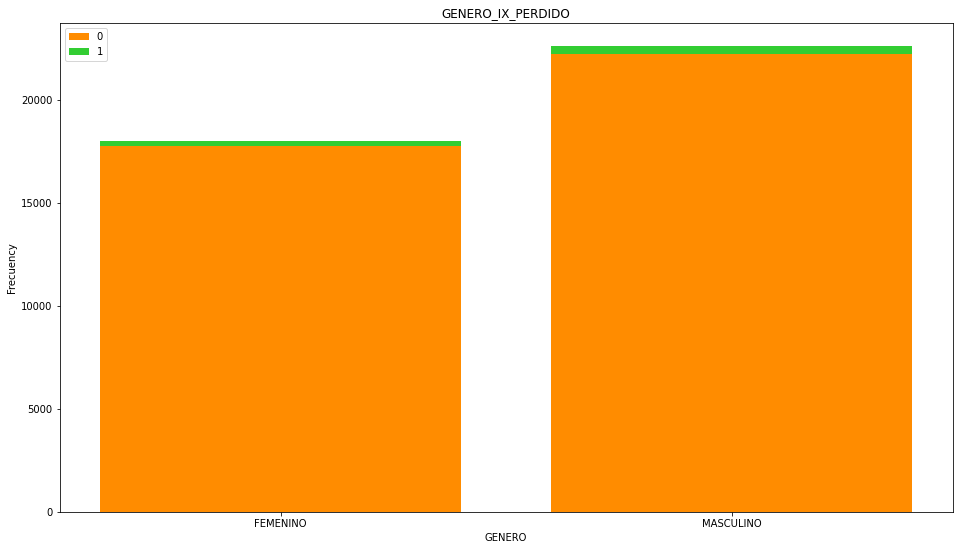

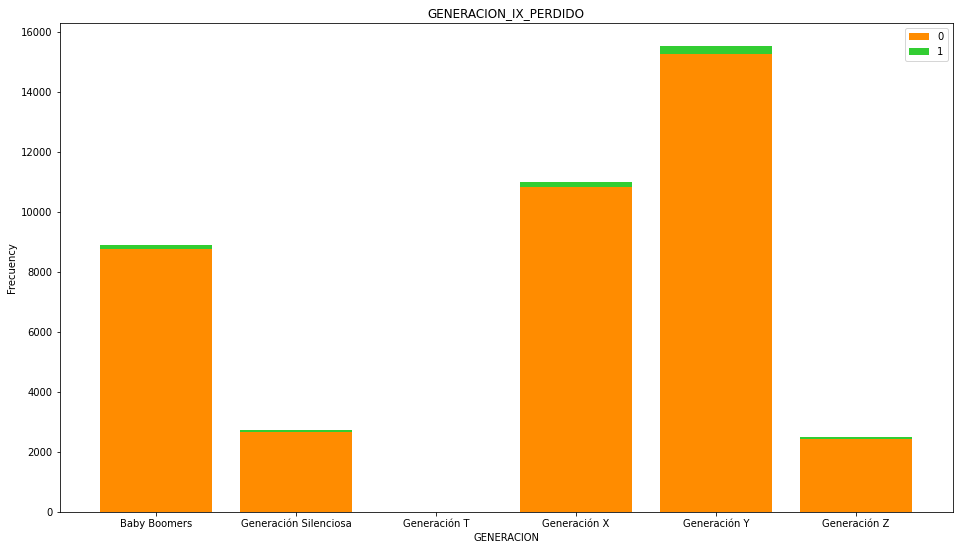

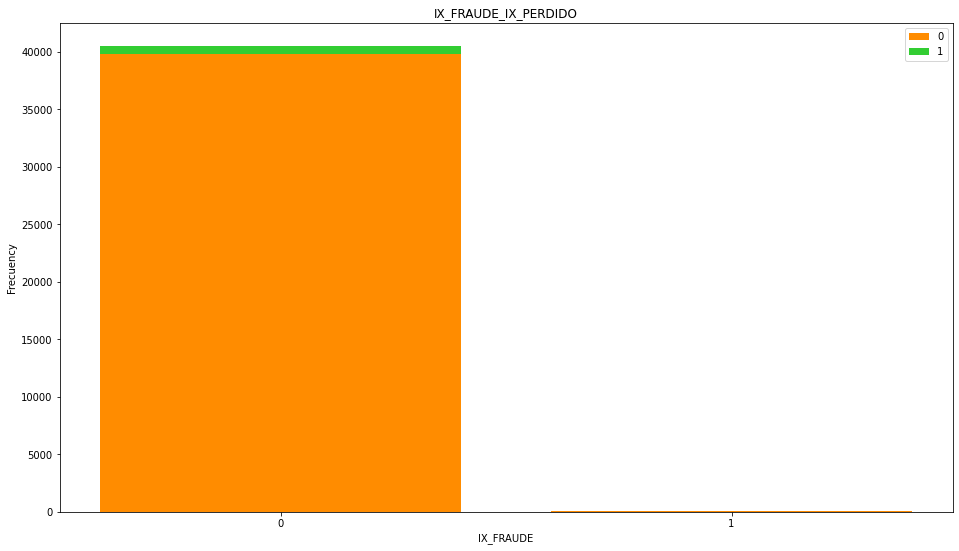

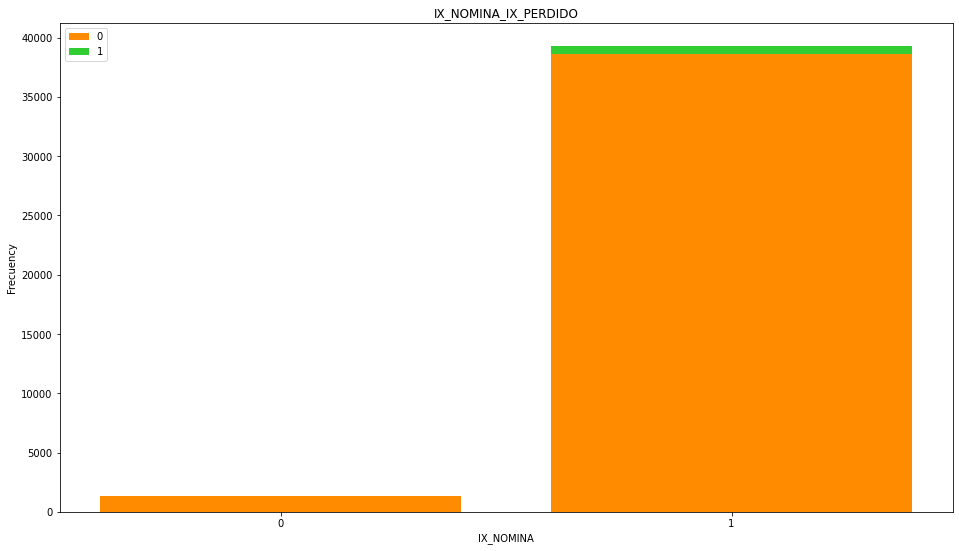

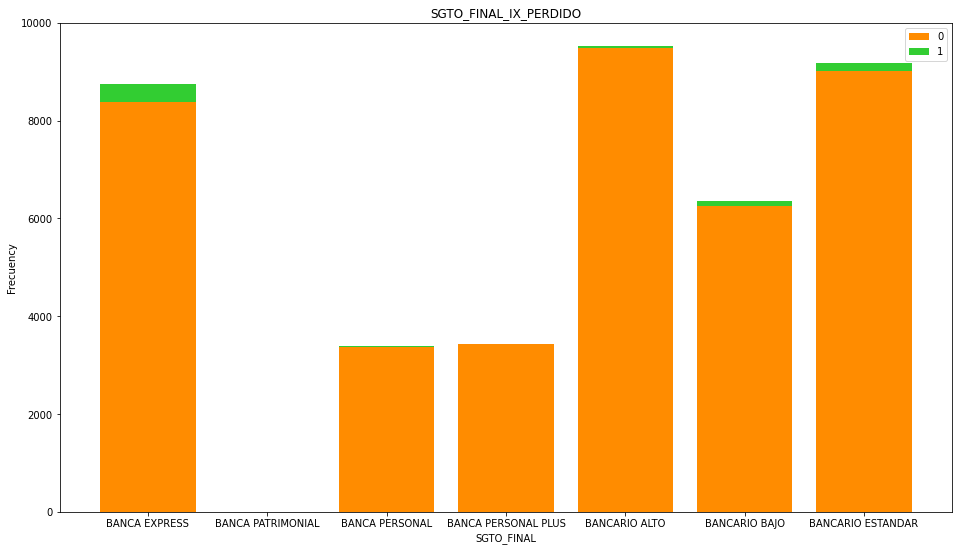

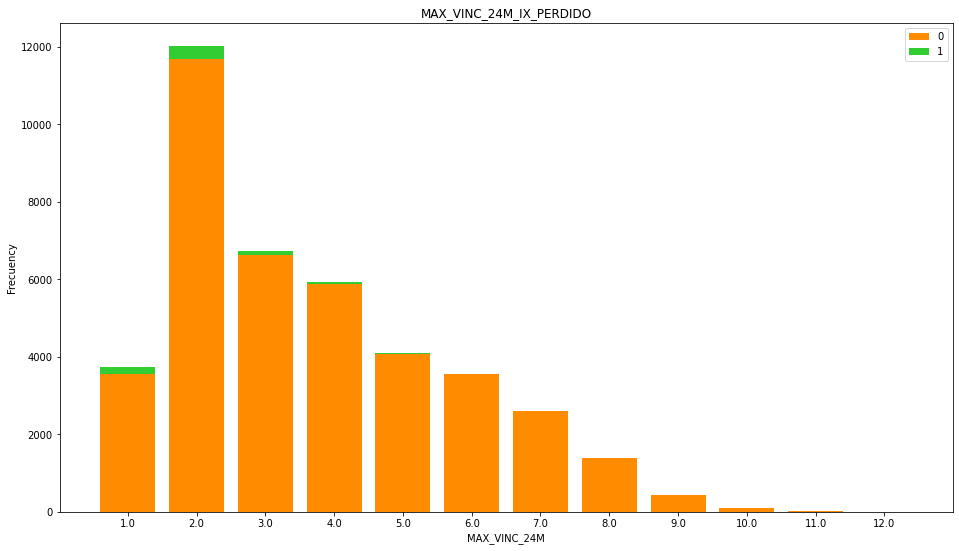

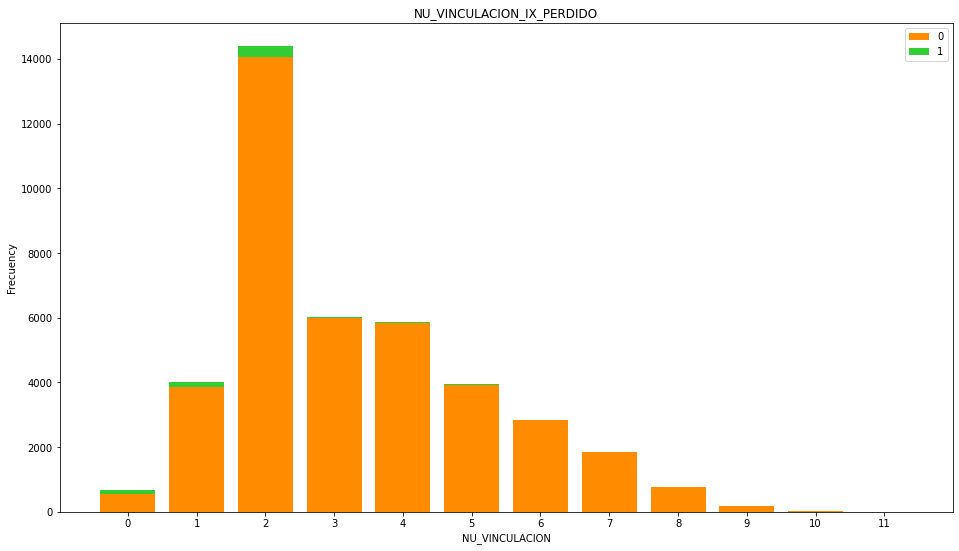

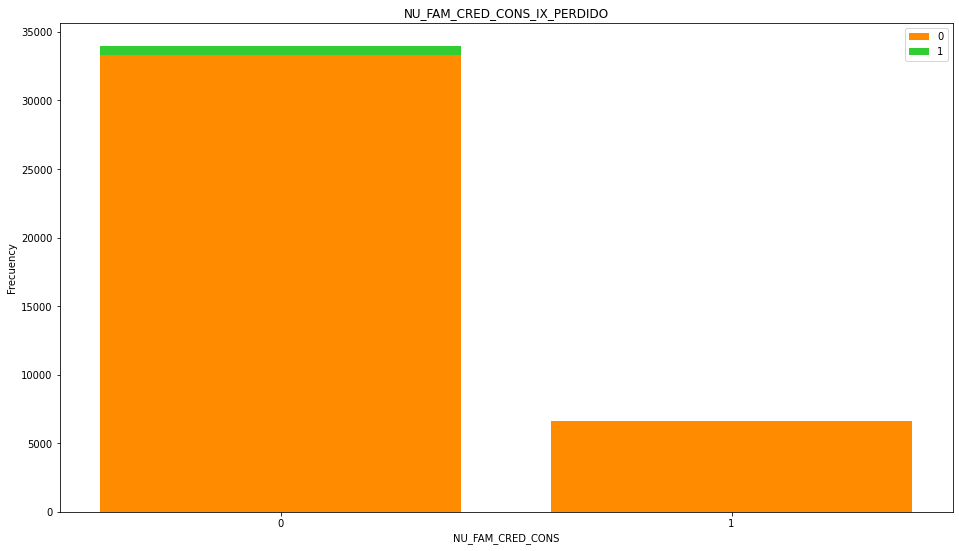

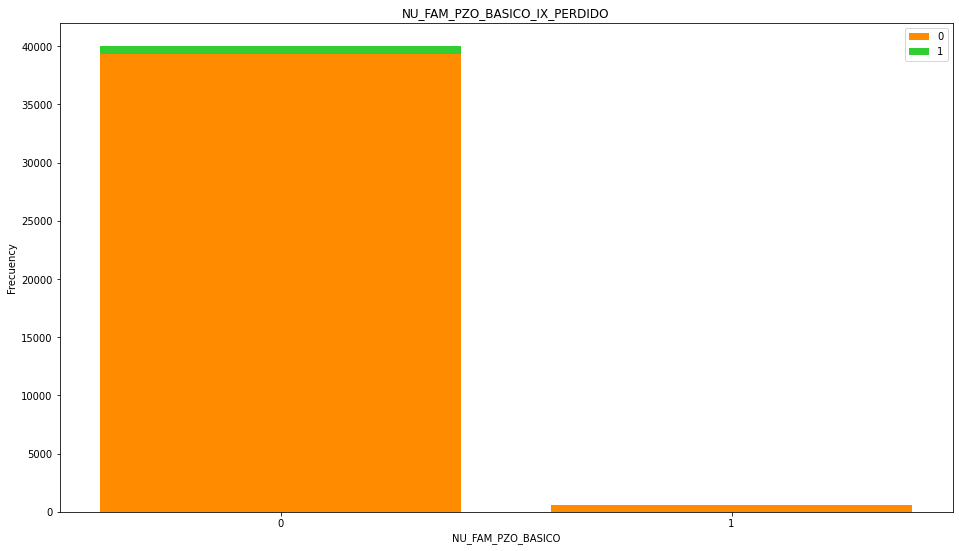

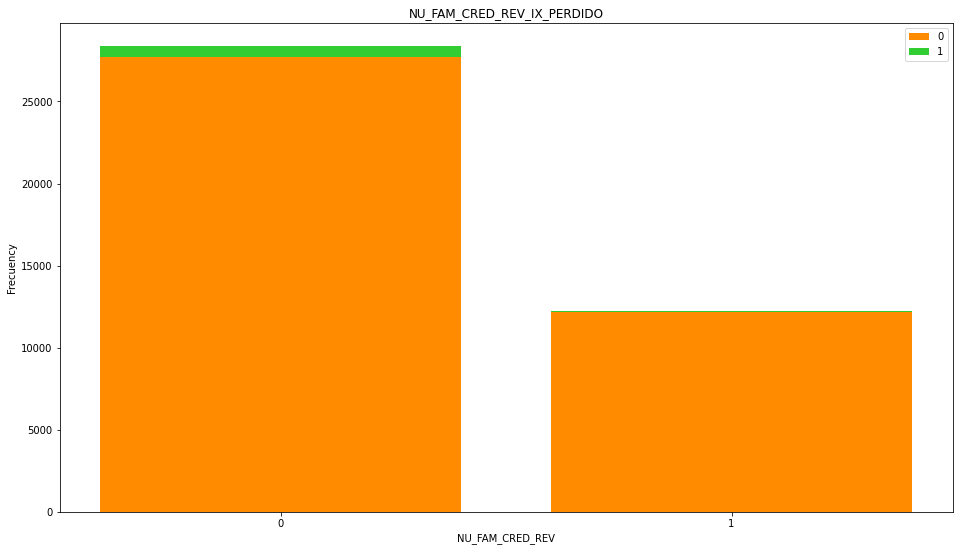

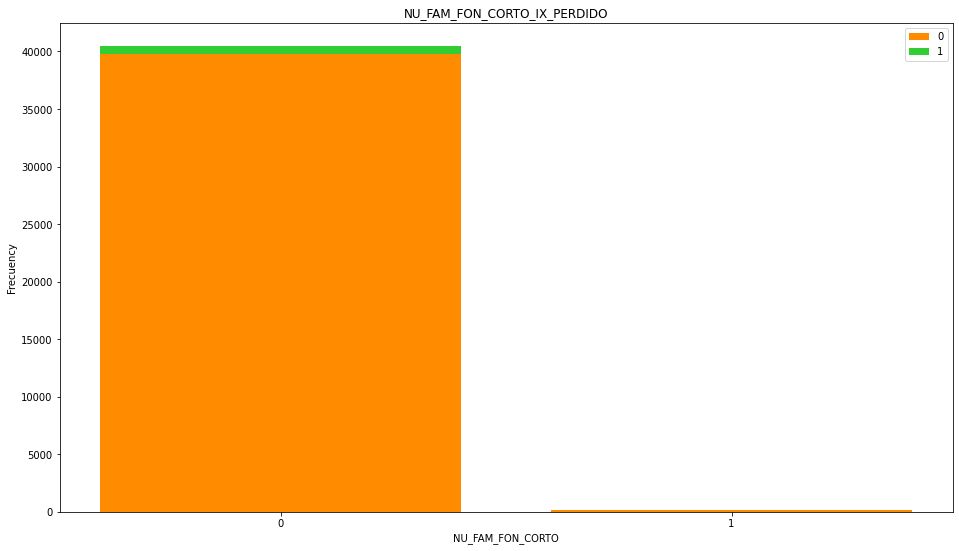

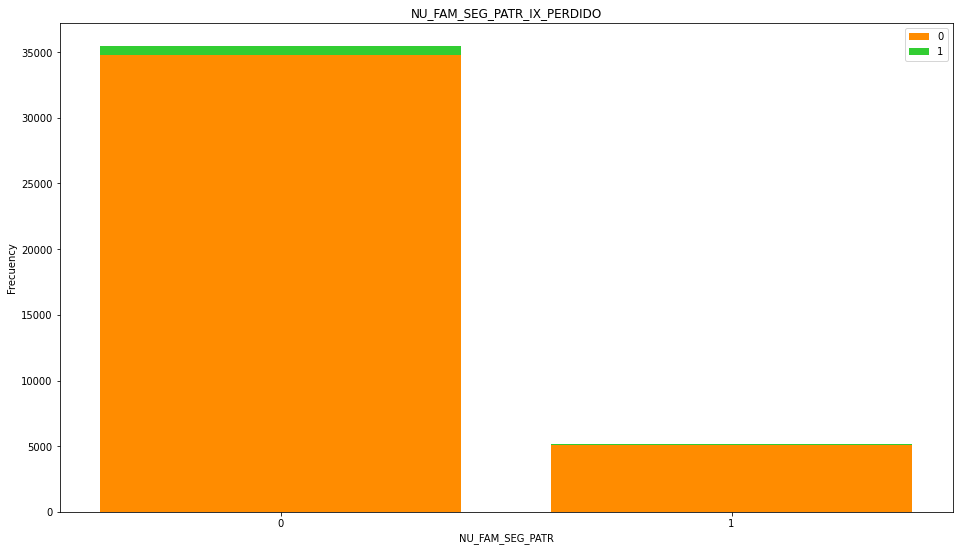

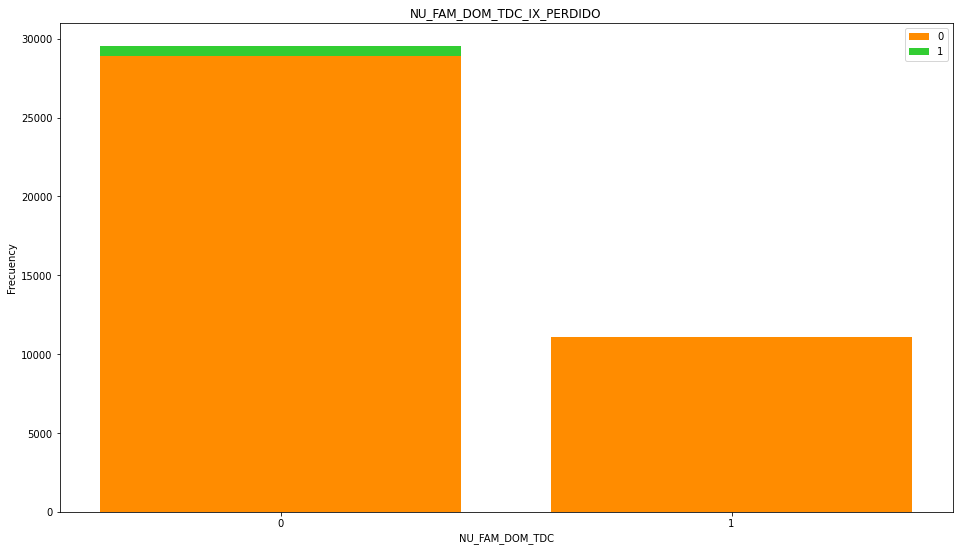

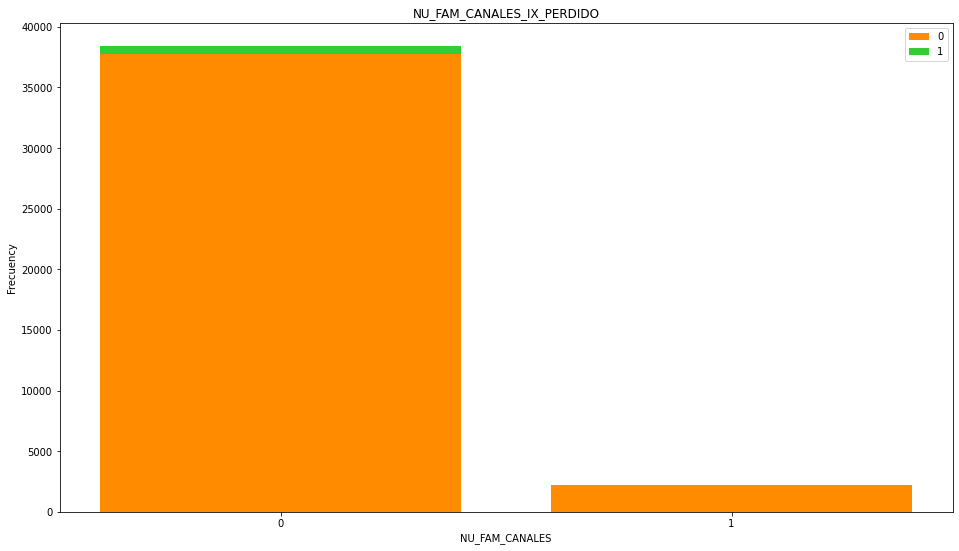

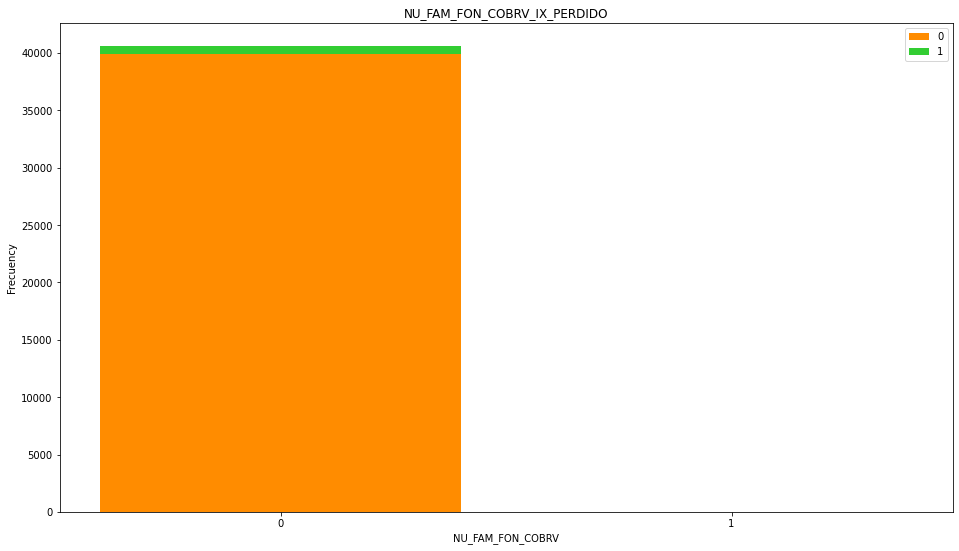

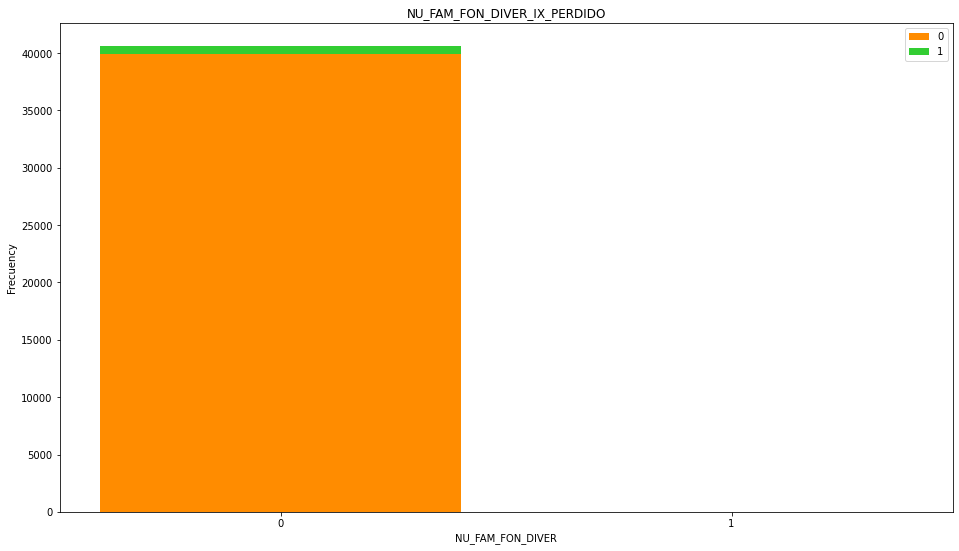

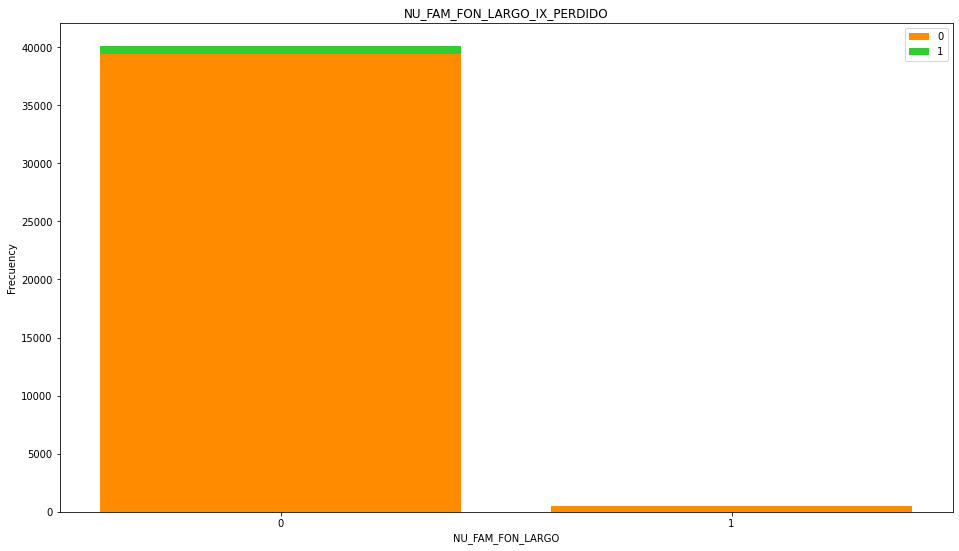

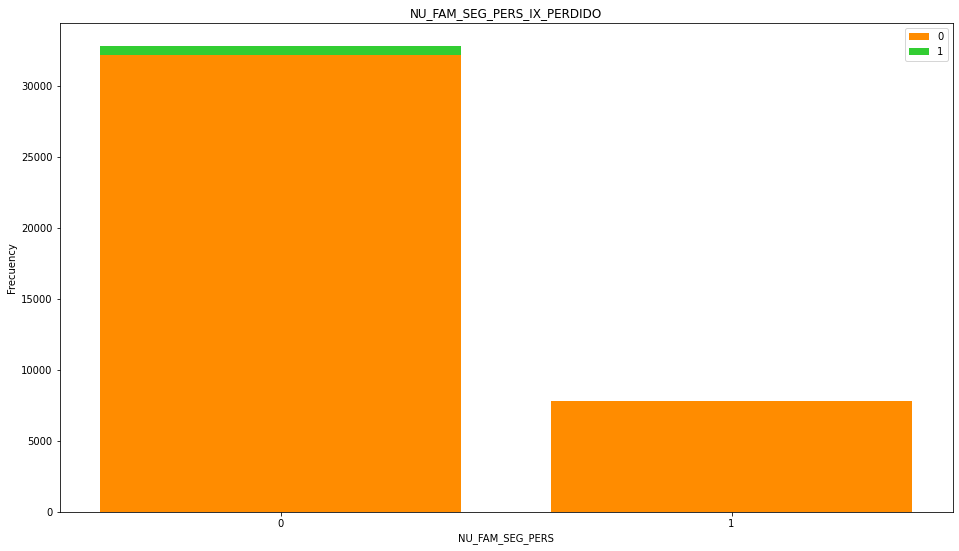

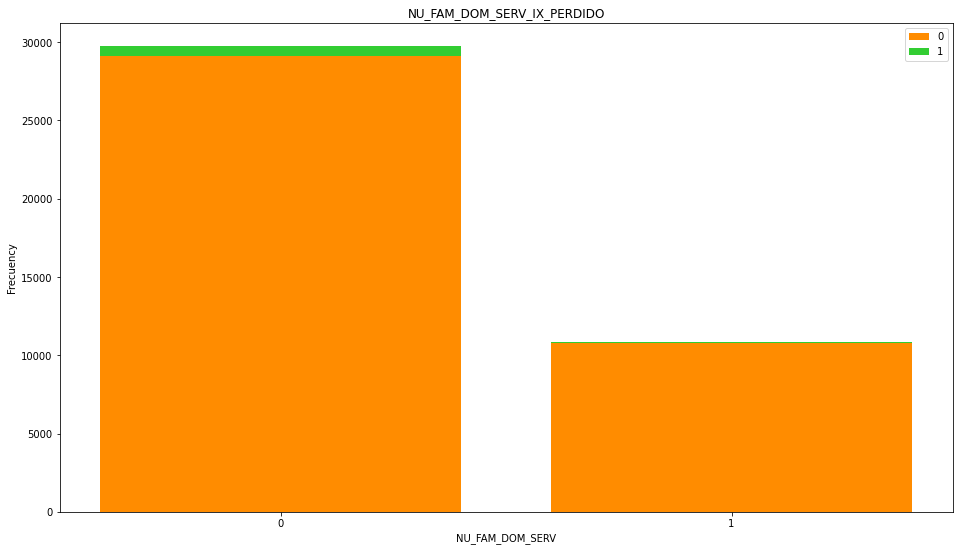

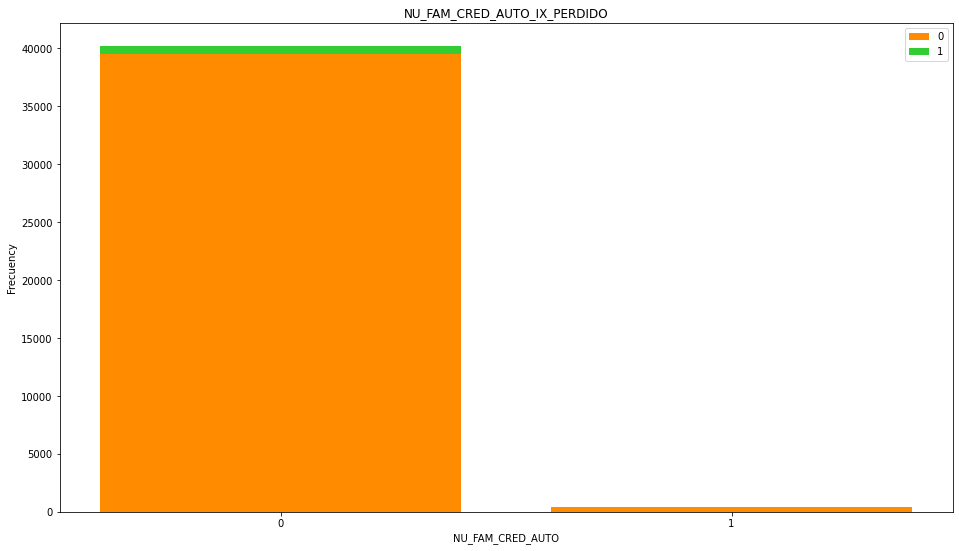

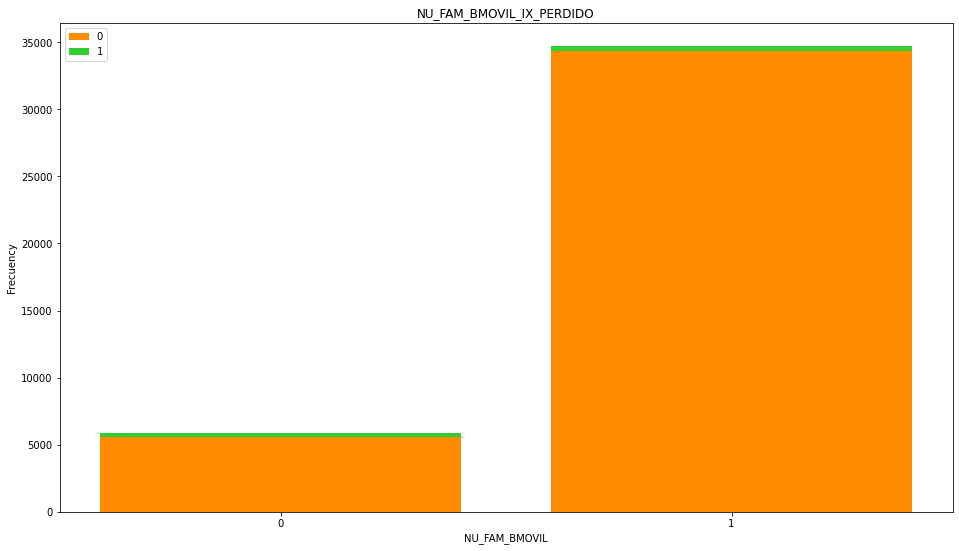

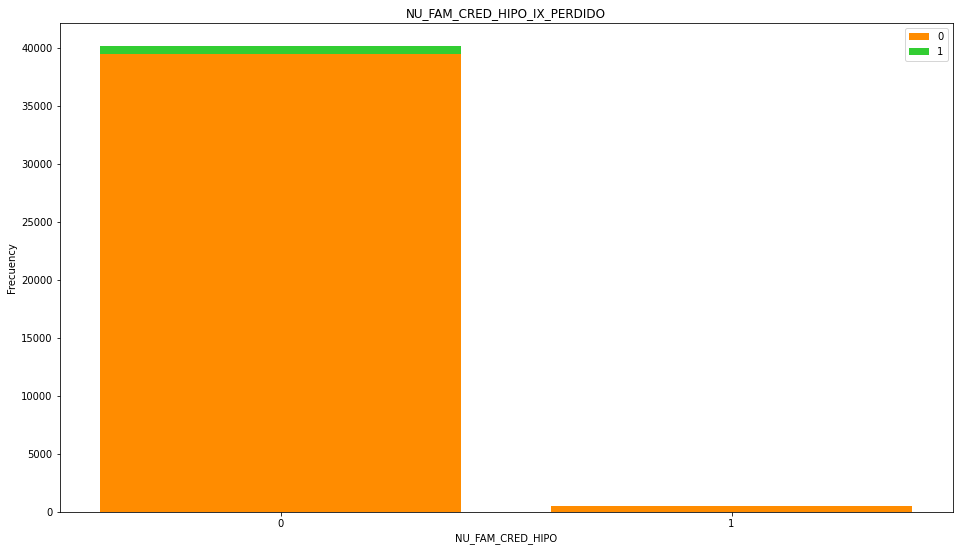

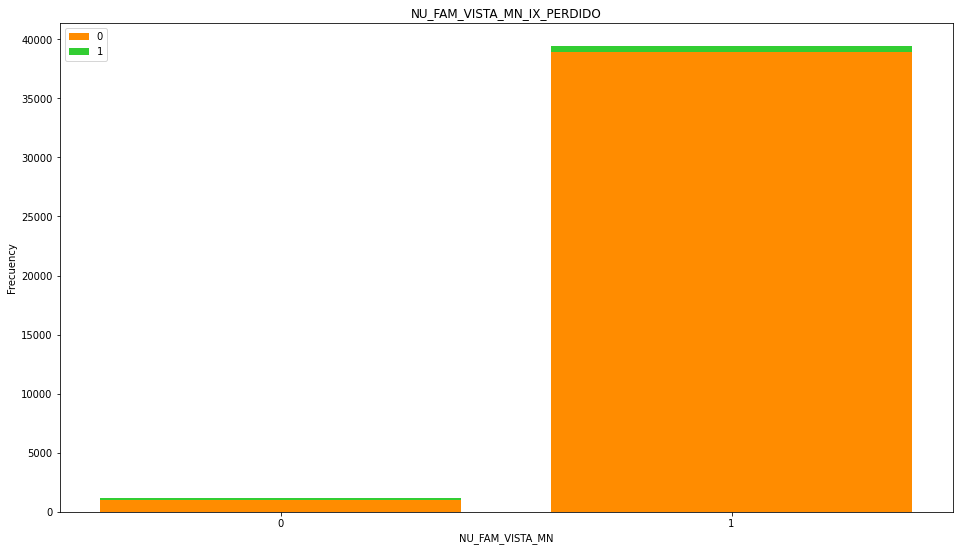

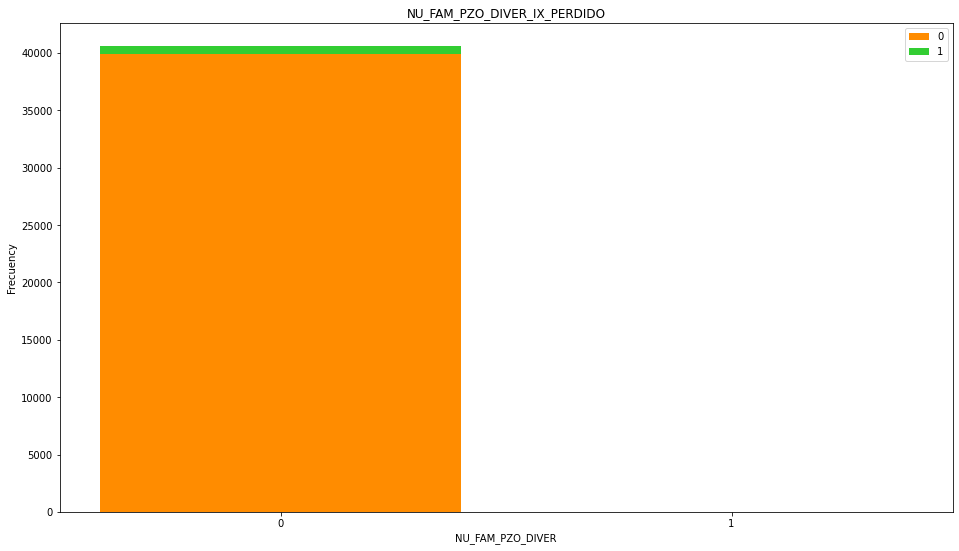

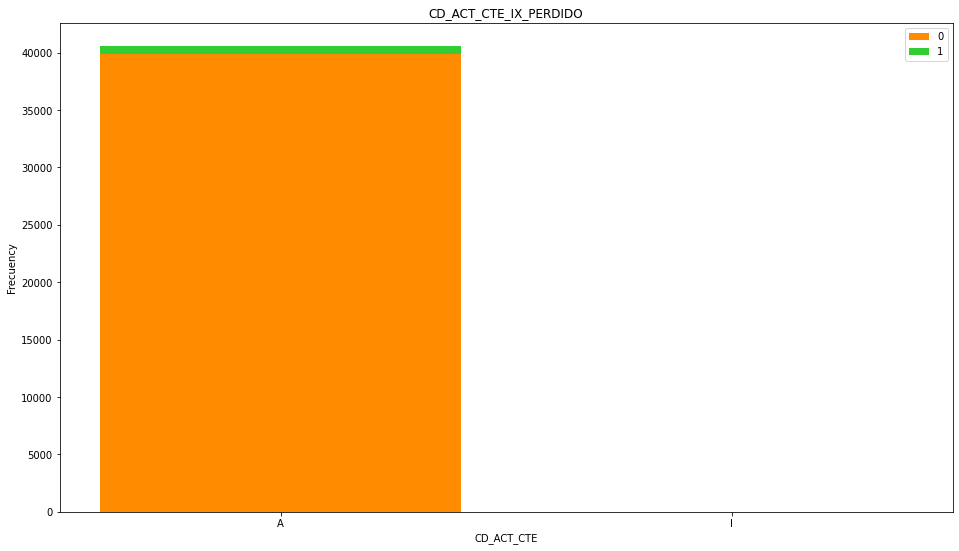

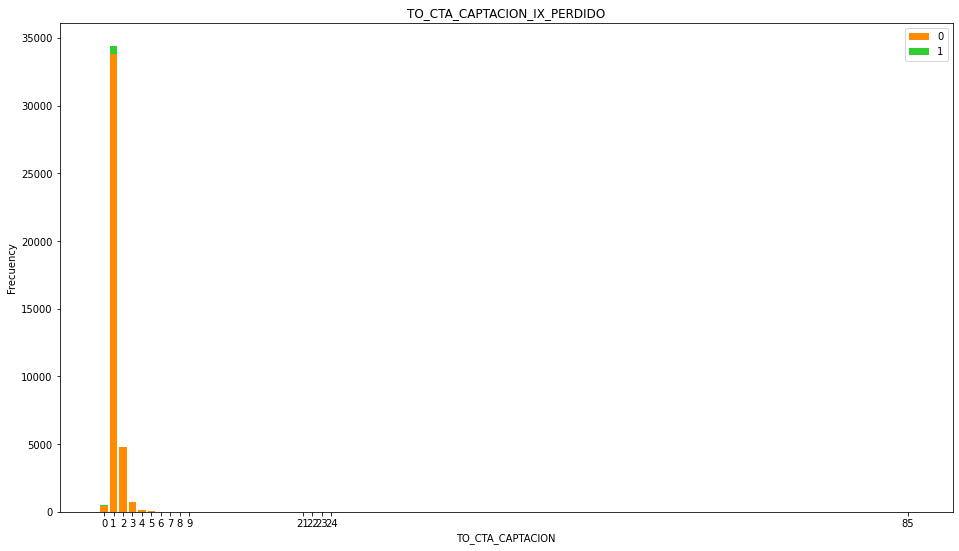

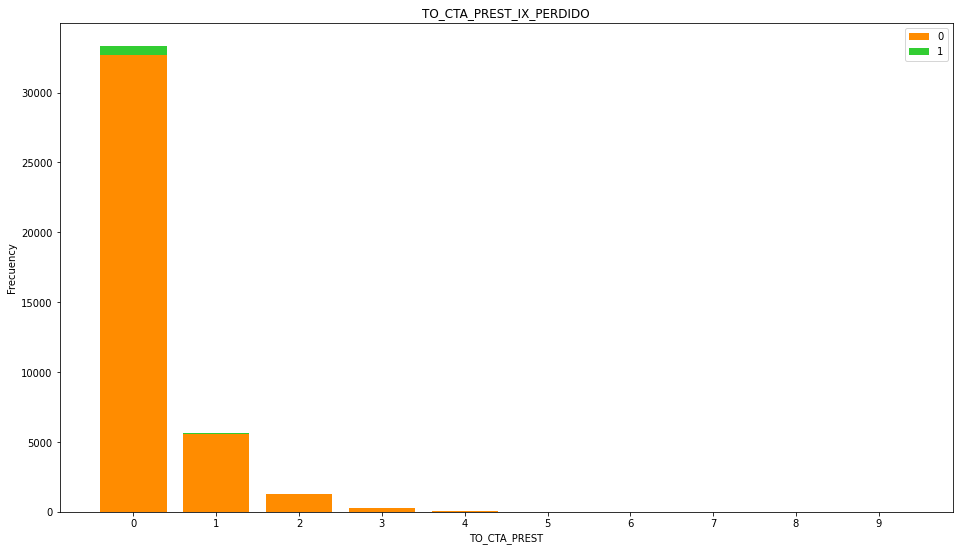

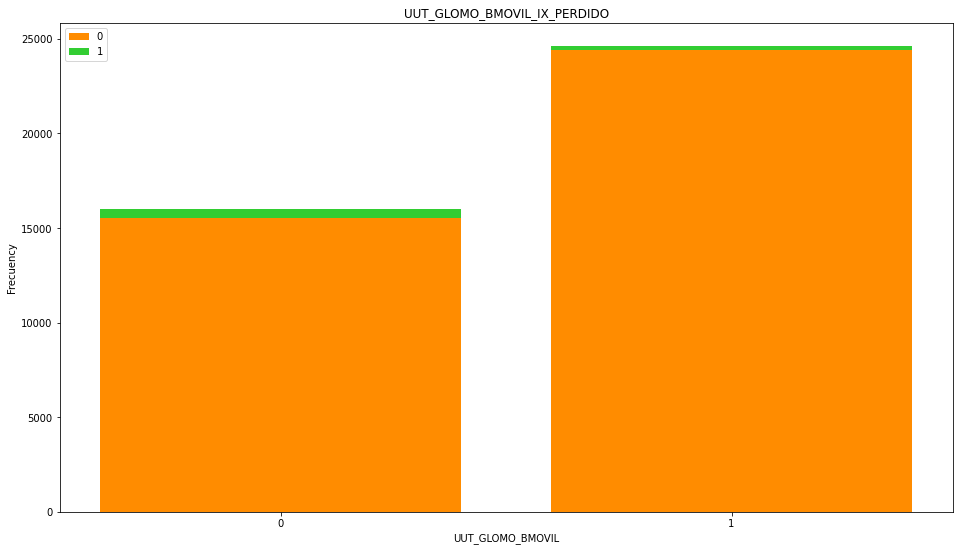

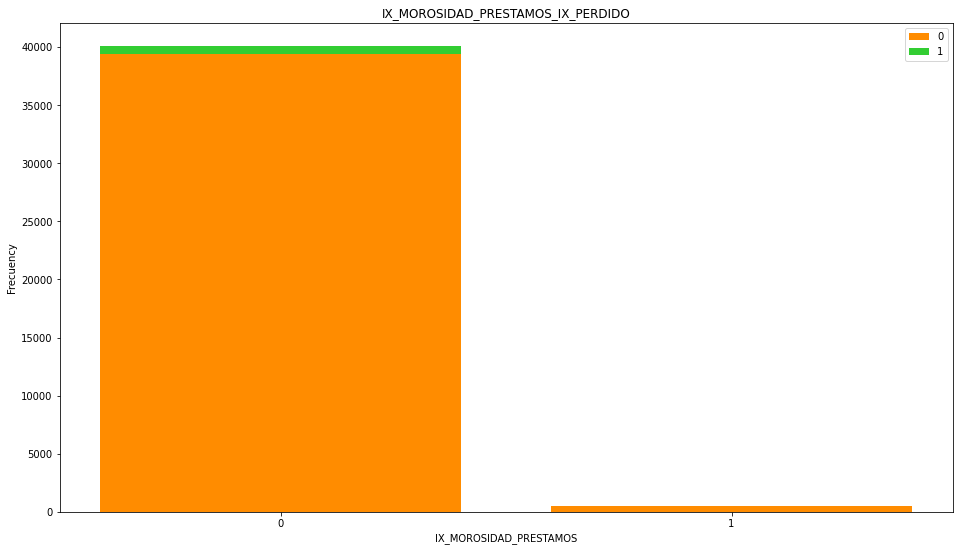

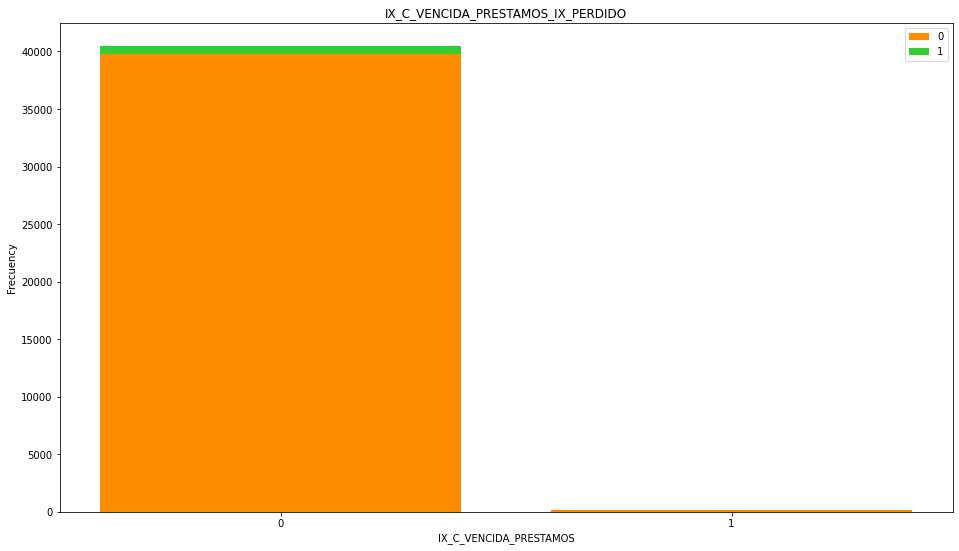

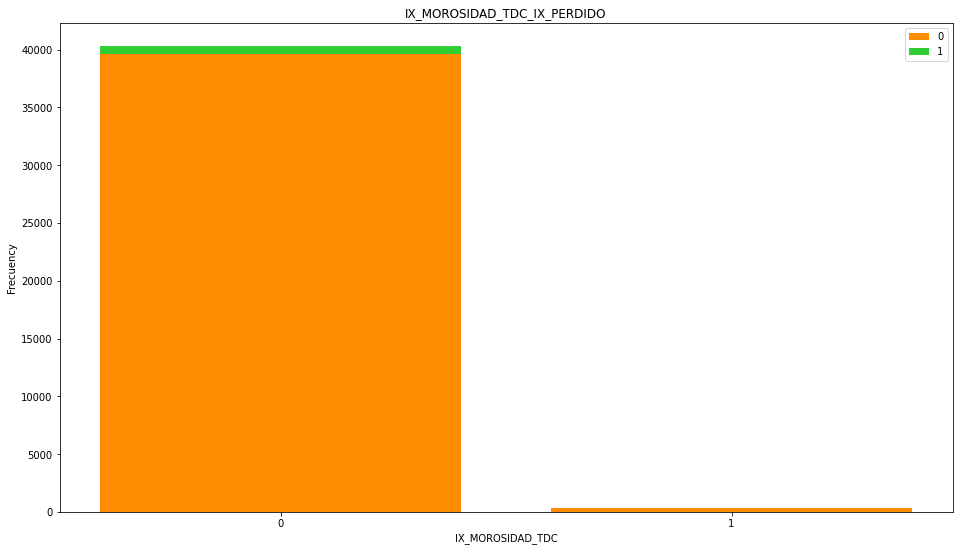

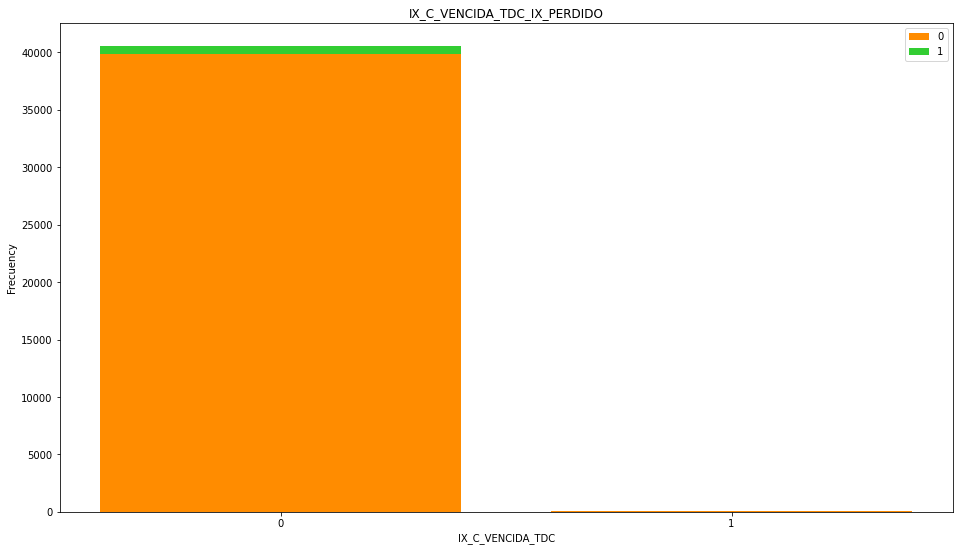

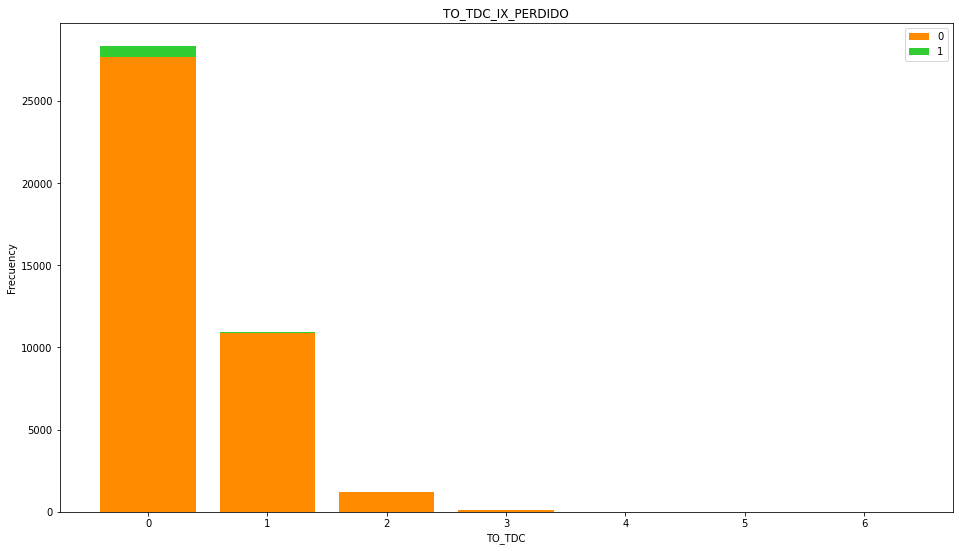

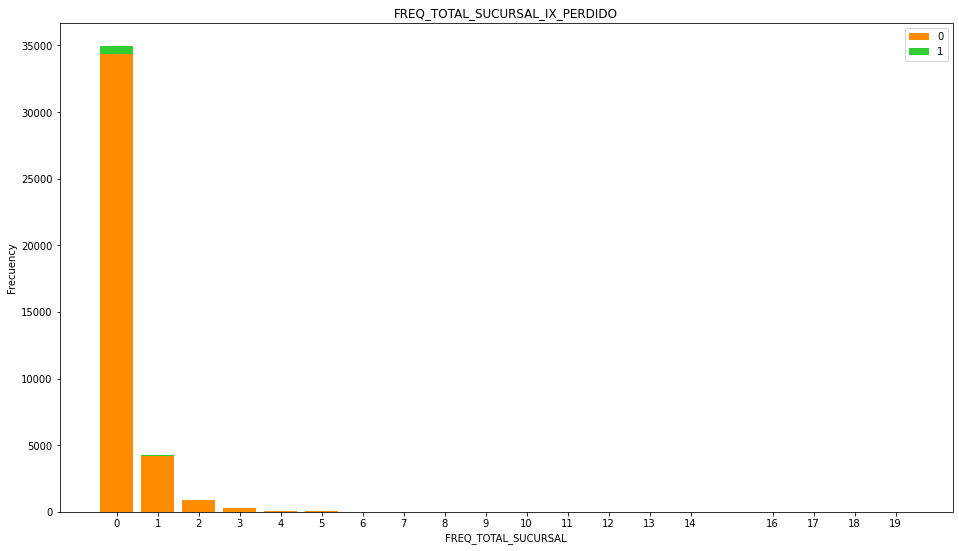

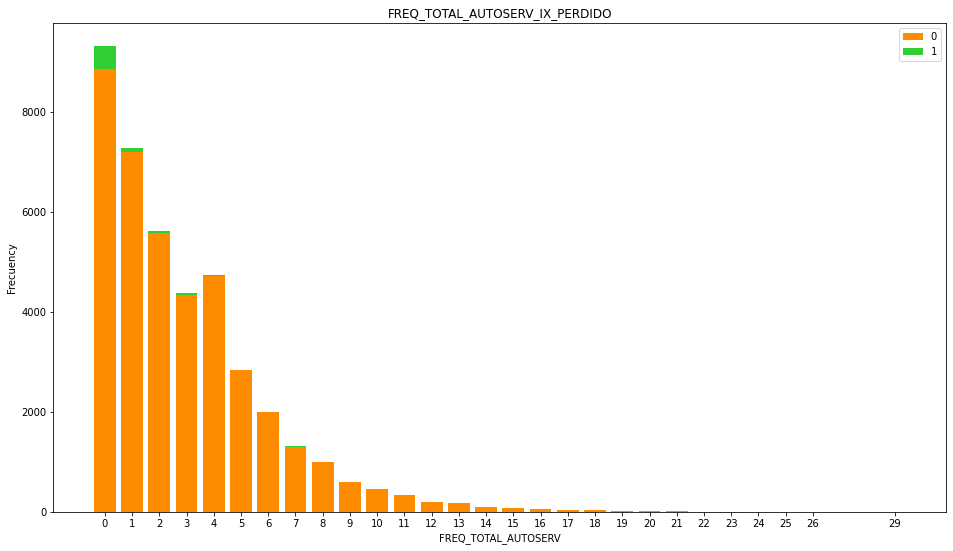

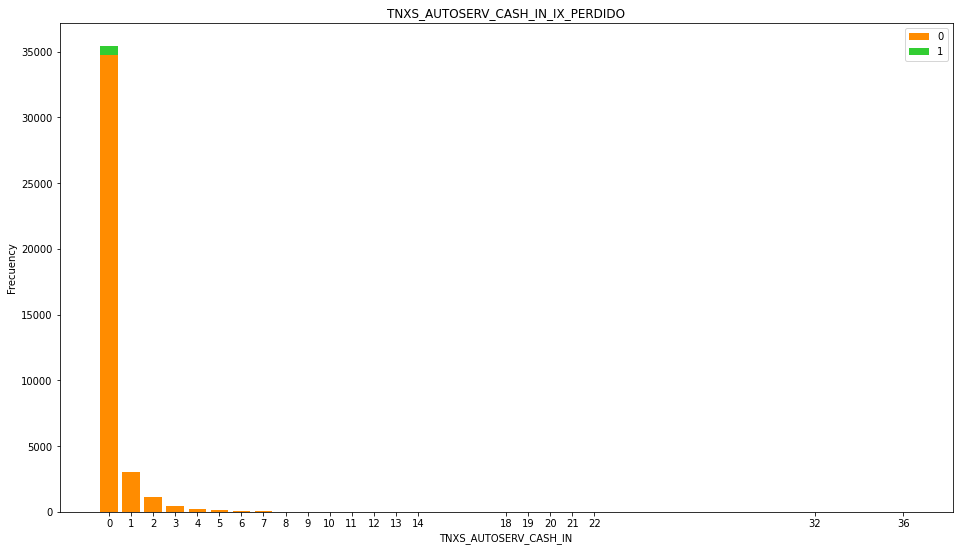

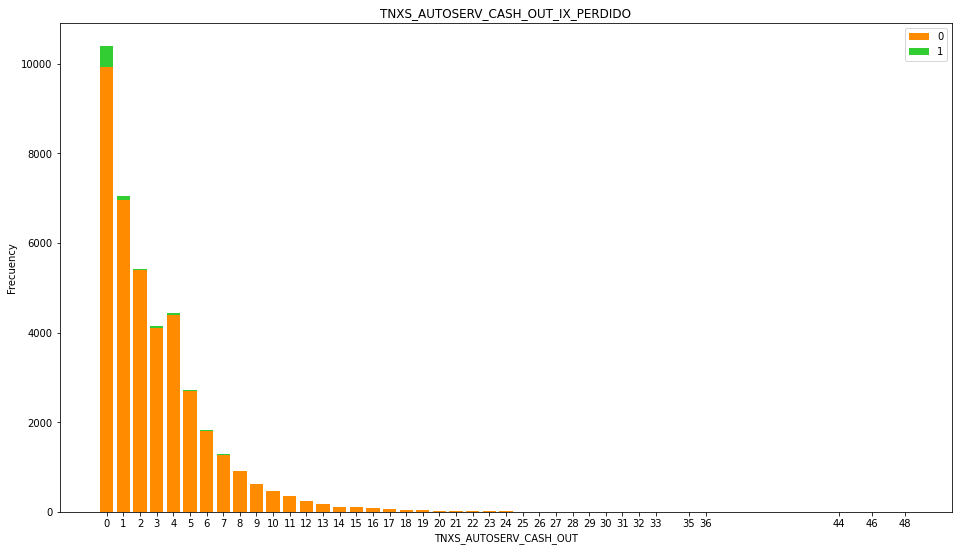

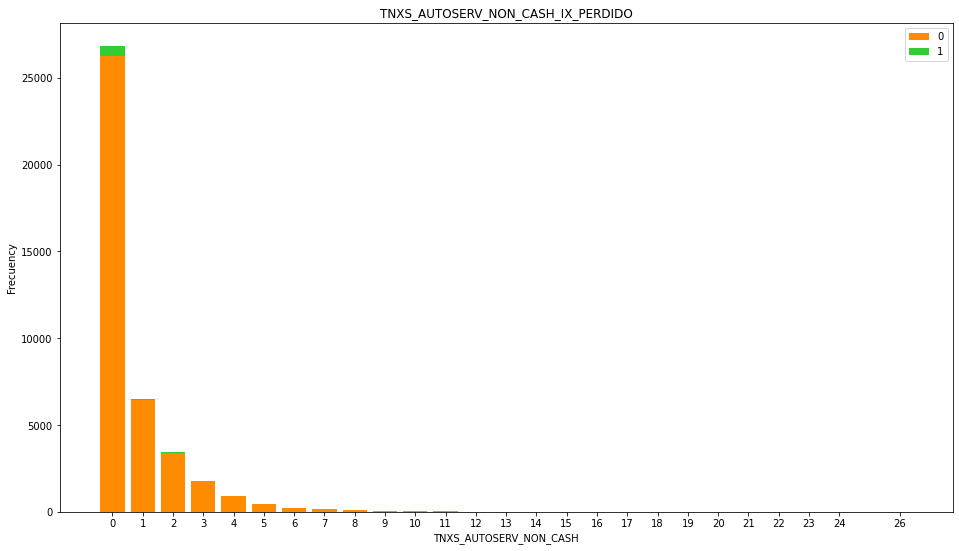

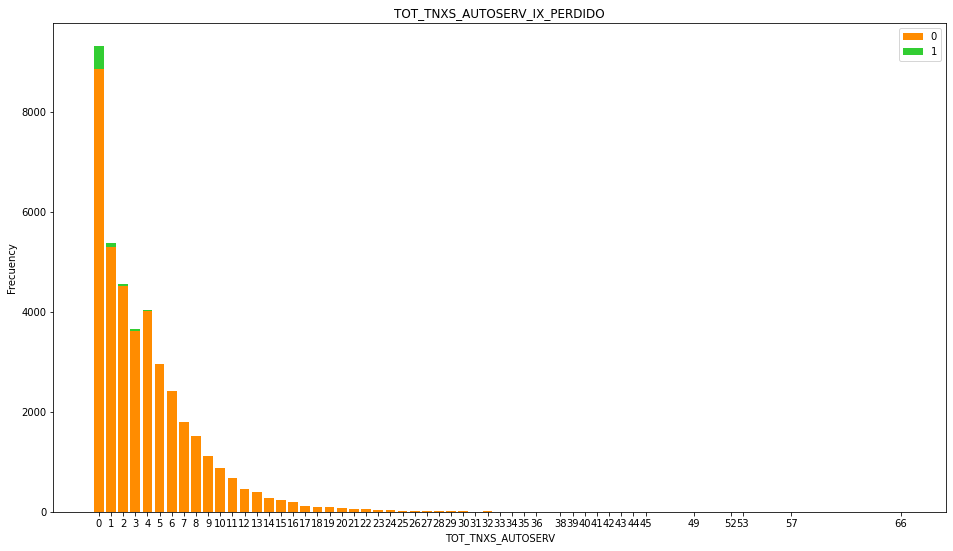

In [ ]:
for j in var_graf:
    cross_grafica(data,j,'IX_PERDIDO')

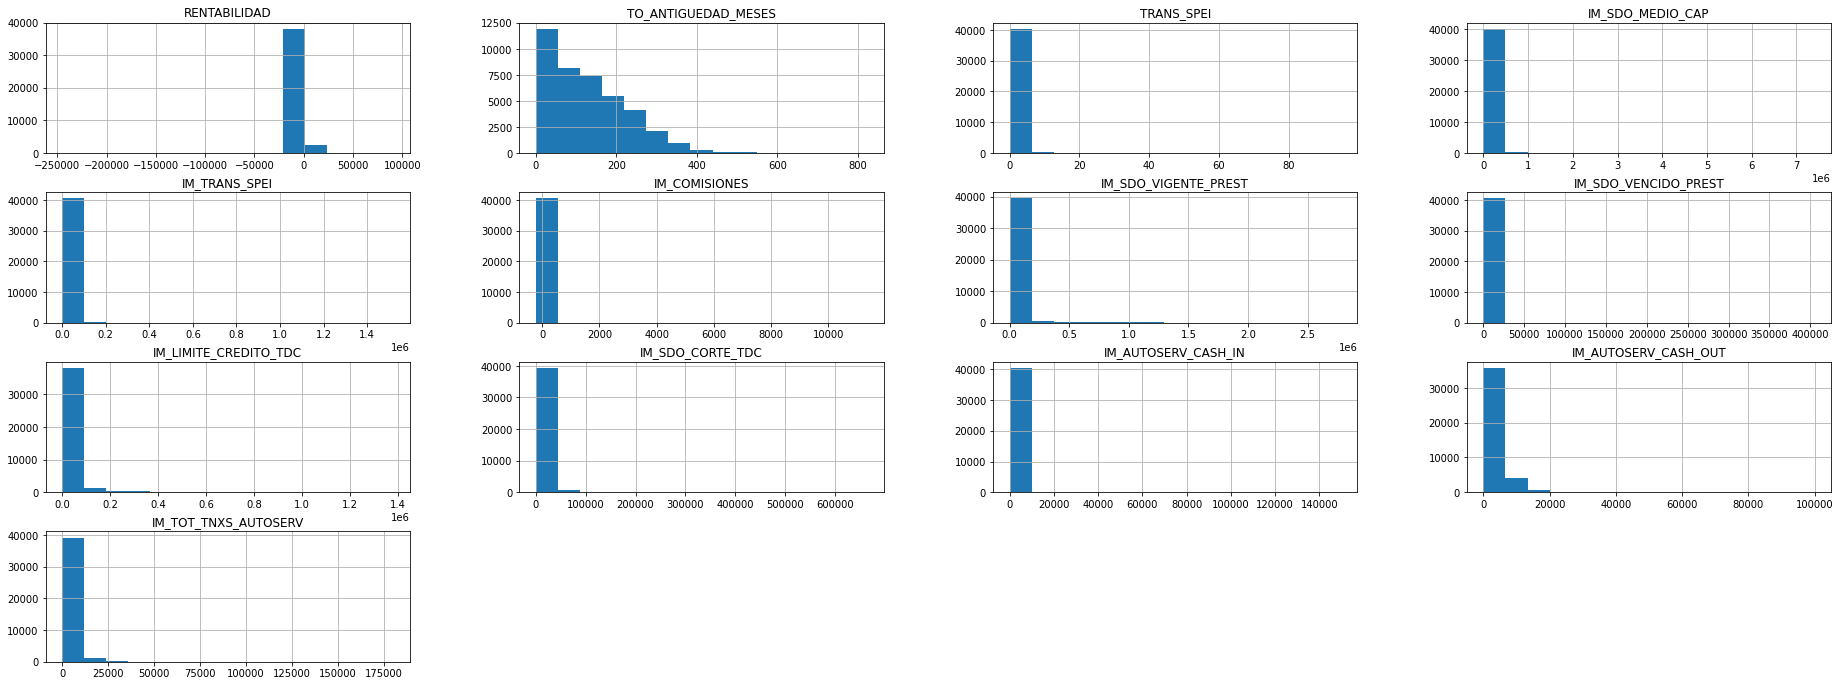

In [ ]:
data[var_graf2].hist(bins=15, figsize=(32, 18), layout=(6, 4))
plt.show()

In [ ]:
#Realizamos el mismo analisis exploratorio pero con los datos balanceados
target_1 = data[data['IX_PERDIDO']==1]
target_0 = data[data['IX_PERDIDO']==0].sample(n=target_1.shape[0],random_state=10)
data_balanced = pd.concat([target_0,target_1])
data_balanced

,IX_PERDIDO,GENERO,TO_ANTIGUEDAD_MESES,GENERACION,SGTO_FINAL,MAX_VINC_24M,IX_NOMINA,RENTABILIDAD,NB_BANCA_OFICINA_PPAL,NU_VINCULACION,NU_FAM_CRED_CONS,NU_FAM_PZO_BASICO,NU_FAM_CRED_REV,NU_FAM_FON_CORTO,NU_FAM_MD,NU_FAM_SEG_PATR,NU_FAM_DOM_TDC,NU_FAM_CANALES,NU_FAM_FON_COBRV,NU_FAM_NOMINA,NU_FAM_FON_DIVER,NU_FAM_FON_LARGO,NU_FAM_SEG_PERS,NU_FAM_DOM_SERV,NU_FAM_CRED_AUTO,NU_FAM_VISTA_ME,NU_FAM_COBR_DOC,NU_FAM_BMOVIL,NU_FAM_CRED_HIPO,NU_FAM_VISTA_MN,NU_FAM_PZO_DIVER,NU_FAM_MC,NU_FAM_TDC_PAT,TRANS_SPEI,CD_ACT_CTE,TO_CTA_CAPTACION,IM_SDO_MEDIO_CAP,TO_CTA_PREST,UUT_GLOMO_BMOVIL,IX_MOROSIDAD_PRESTAMOS,IX_C_VENCIDA_PRESTAMOS,IX_MOROSIDAD_TDC,IX_C_VENCIDA_TDC,TO_TDC,IX_FRAUDE,FREQ_TOTAL_SUCURSAL,FREQ_TOTAL_AUTOSERV,TNXS_AUTOSERV_CASH_IN,TNXS_AUTOSERV_CASH_OUT,TNXS_AUTOSERV_NON_CASH,TOT_TNXS_AUTOSERV,IM_TRANS_SPEI,IM_COMISIONES,IM_SDO_VIGENTE_PREST,IM_SDO_VENCIDO_PREST,IM_LIMITE_CREDITO_TDC,IM_SDO_CORTE_TDC,IM_AUTOSERV_CASH_IN,IM_AUTOSERV_CASH_OUT,IM_TOT_TNXS_AUTOSERV
28190,0,MASCULINO,237.0,Baby Boomers,BANCA PERSONAL PLUS,9.0,1,10680.36,BCOM,9,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,A,1,25023.03,3,1,0,0,0,0,2,0,0,15,1,16,0,17,17408.750000,0.0,272494.434167,0.0,359400.0,308951.174167,975.0,19091.666667,20066.666667
25120,0,FEMENINO,96.0,Baby Boomers,BANCA EXPRESS,1.0,1,-40.96,BCOM,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,A,2,597.62,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1308.333333,1308.333333
19220,0,FEMENINO,52.0,Generación Y,BANCARIO ESTANDAR,3.0,1,-92.75,BCOM,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,A,1,1399.37,0,1,0,0,0,0,0,0,0,10,0,14,0,14,926.166667,0.0,0.000000,0.0,0.0,0.000000,0.0,5358.333333,5358.333333
32678,0,MASCULINO,137.0,Baby Boomers,BANCARIO ESTANDAR,2.0,1,129.25,BCOM,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,A,1,64176.61,0,1,0,0,0,0,0,0,6,1,0,1,0,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1766.666667,1766.666667
27575,0,FEMENINO,104.0,Generación Y,BANCARIO ALTO,3.0,1,-50.38,BCOM,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,A,1,6801.29,0,1,0,0,0,0,0,0,1,5,0,5,0,5,16202.833333,0.0,0.000000,0.0,0.0,0.000000,662.5,5641.666667,6304.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40365,1,MASCULINO,96.0,Generación Y,BANCA EXPRESS,2.0,1,-20.04,BCOM,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,A,1,29.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,591.666667,0.0,0.000000,0.0,0.0,0.000000,0.0,83.333333,83.333333
40393,1,MASCULINO,96.0,Generación Y,BANCA EXPRESS,1.0,1,-20.13,BCOM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A,1,9.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1966.666667,1966.666667
40448,1,FEMENINO,95.0,Generación Y,BANCARIO BAJO,2.0,1,-20.12,BCOM,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,A,1,11.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,900.000000,900.000000
40465,1,MASCULINO,97.0,Generación Y,BANCA EXPRESS,2.0,1,-27.43,BCOM,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,A,1,46.99,0,0,0,0,0,0,0,0,0,2,0,2,4,6,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,3083.333333,3083.333333


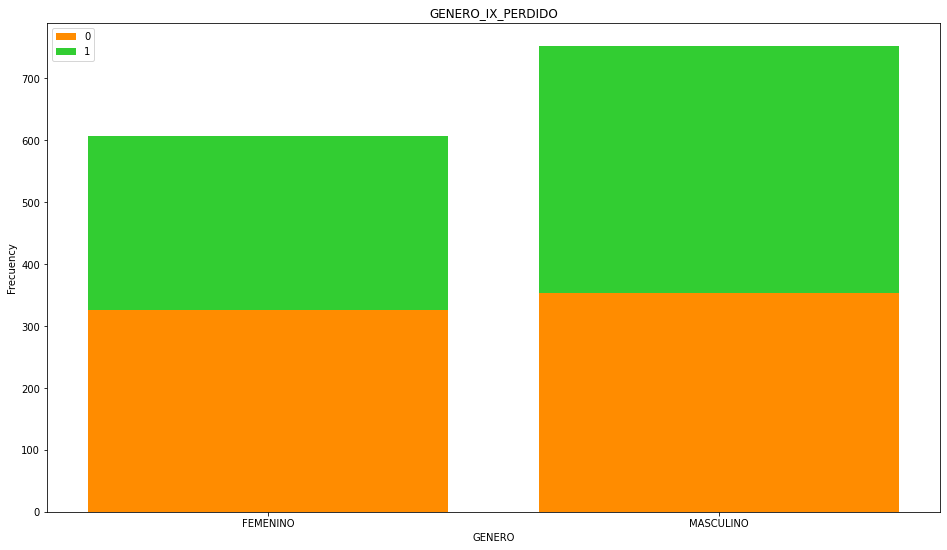

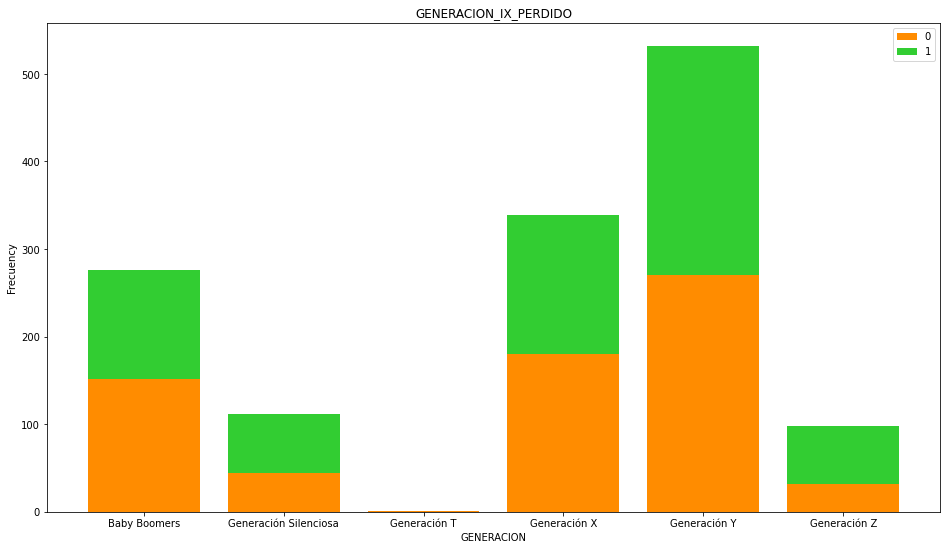

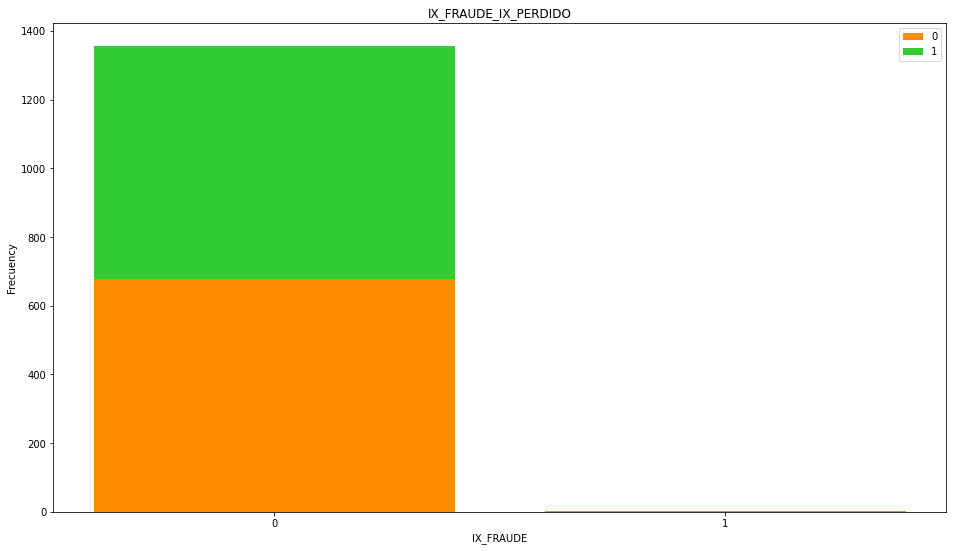

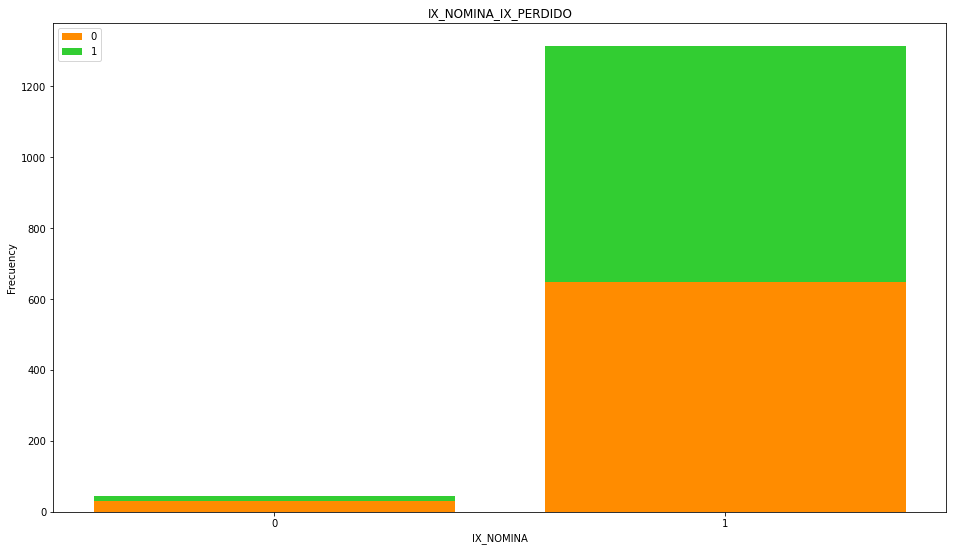

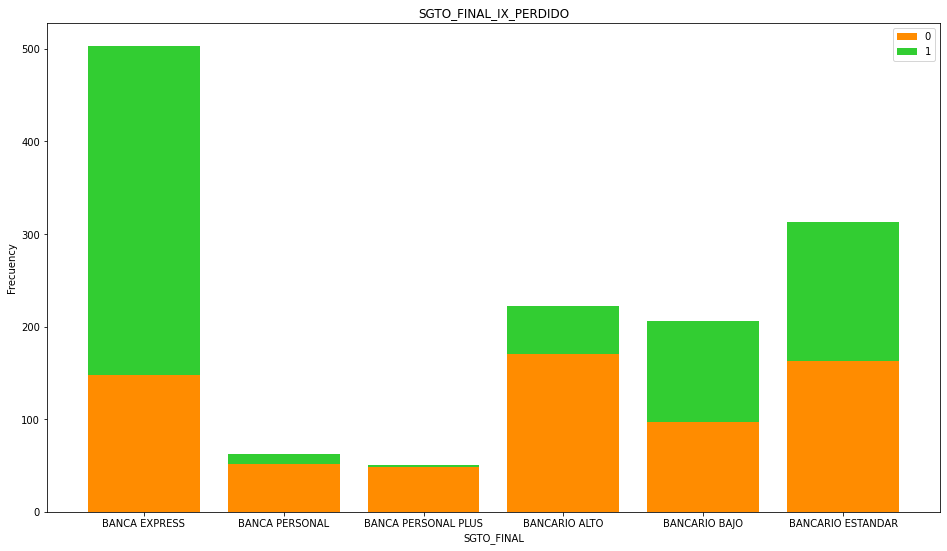

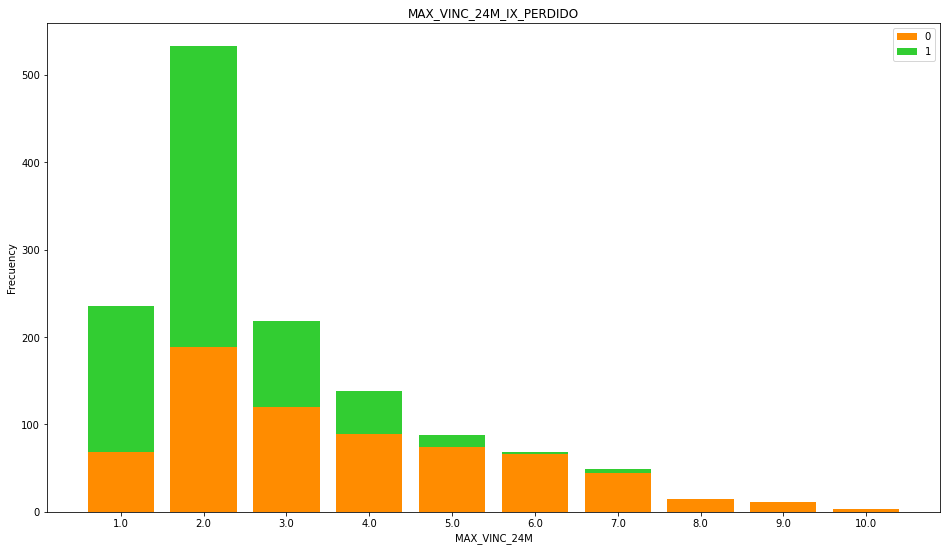

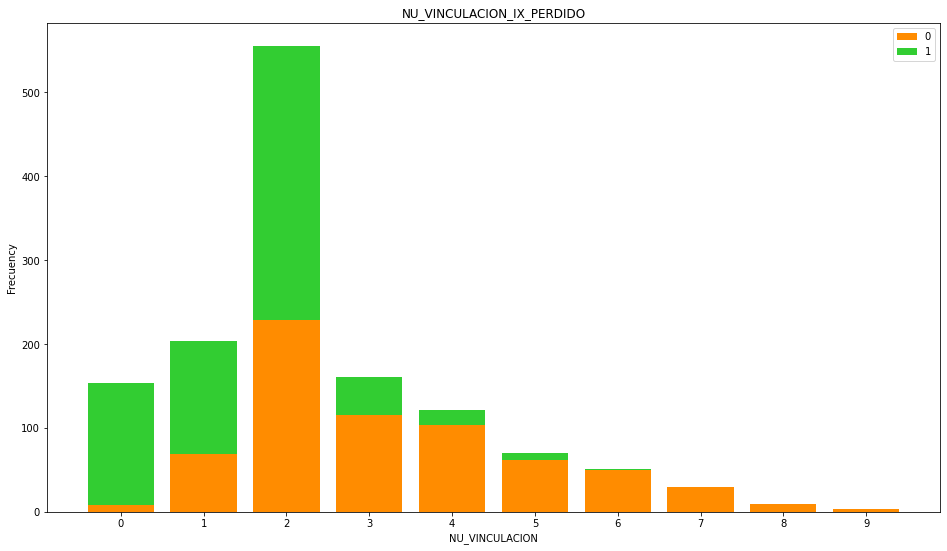

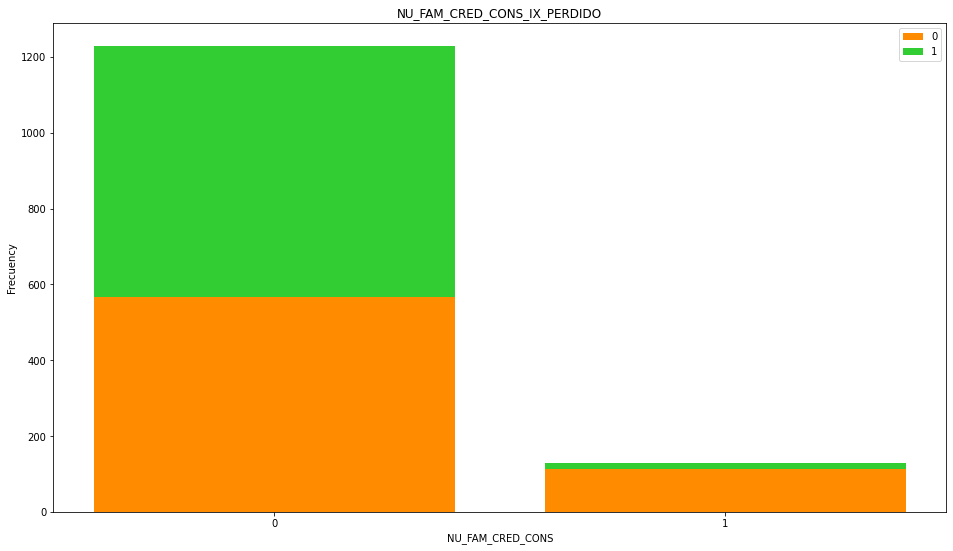

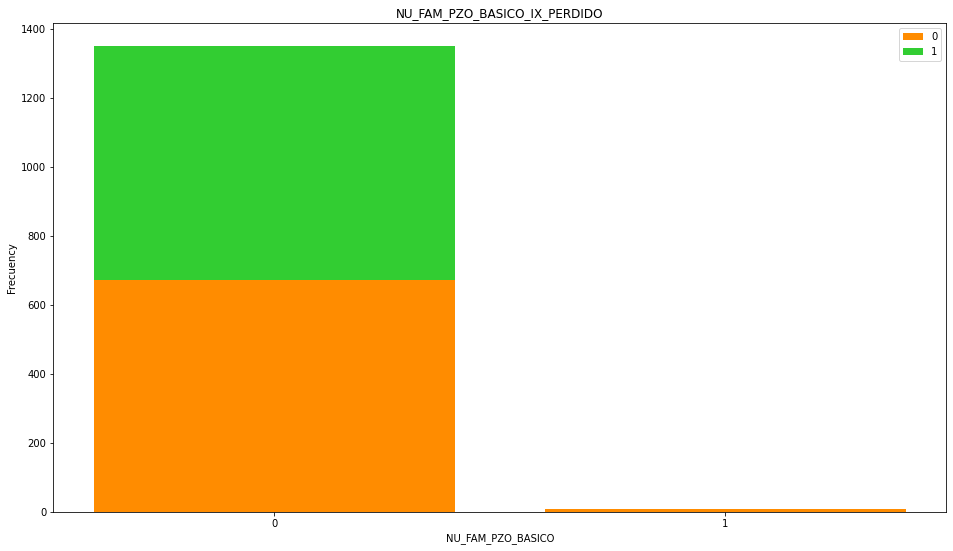

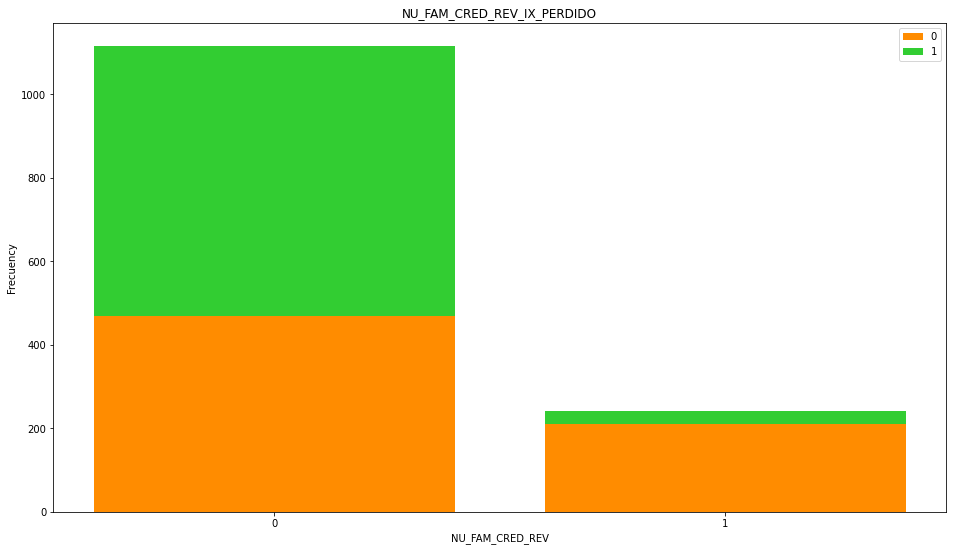

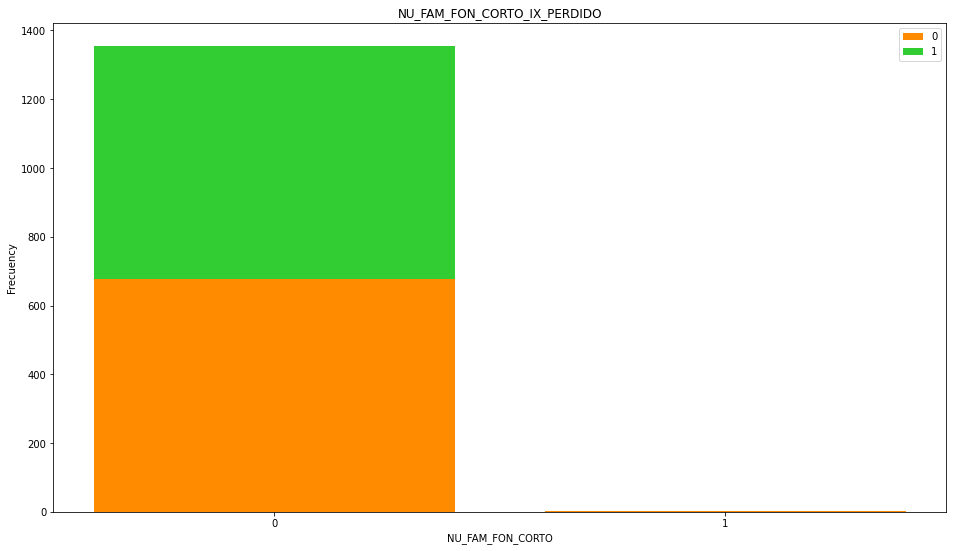

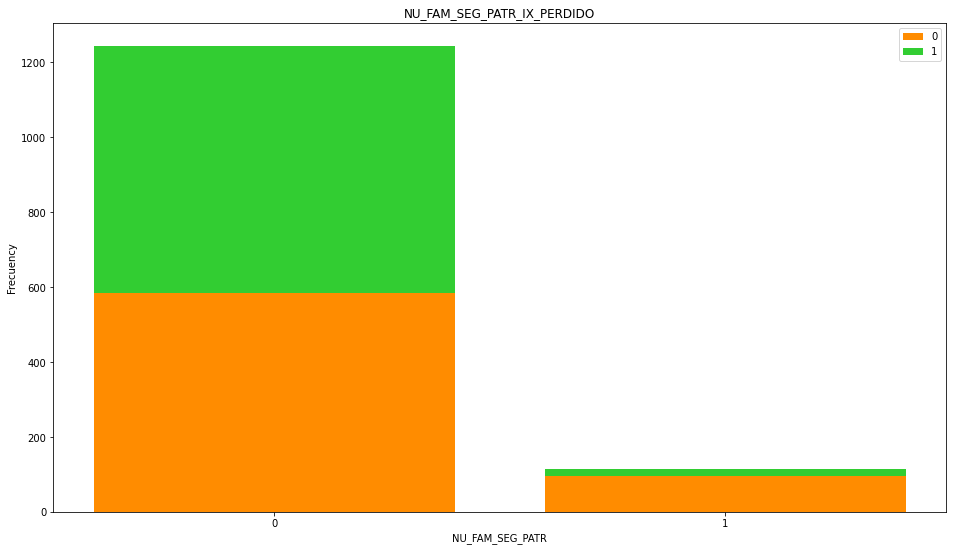

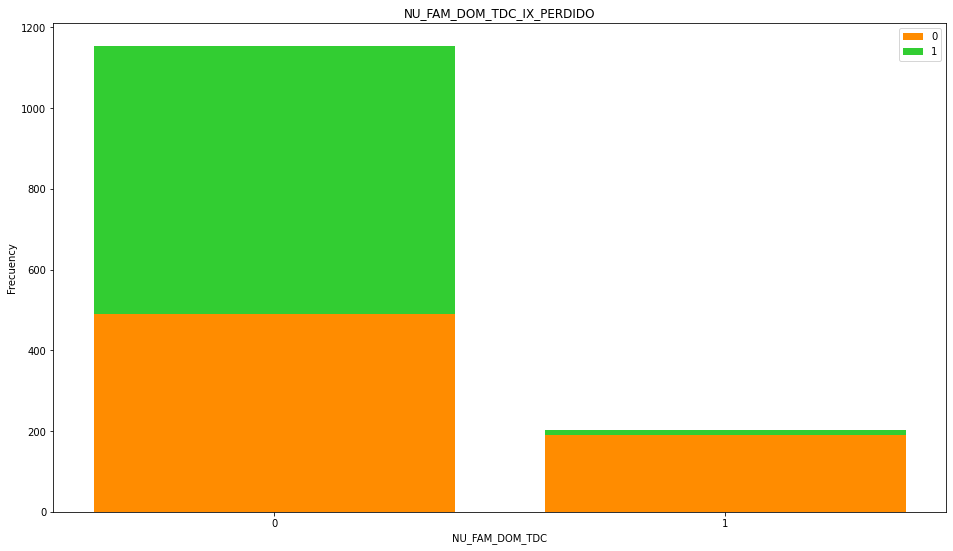

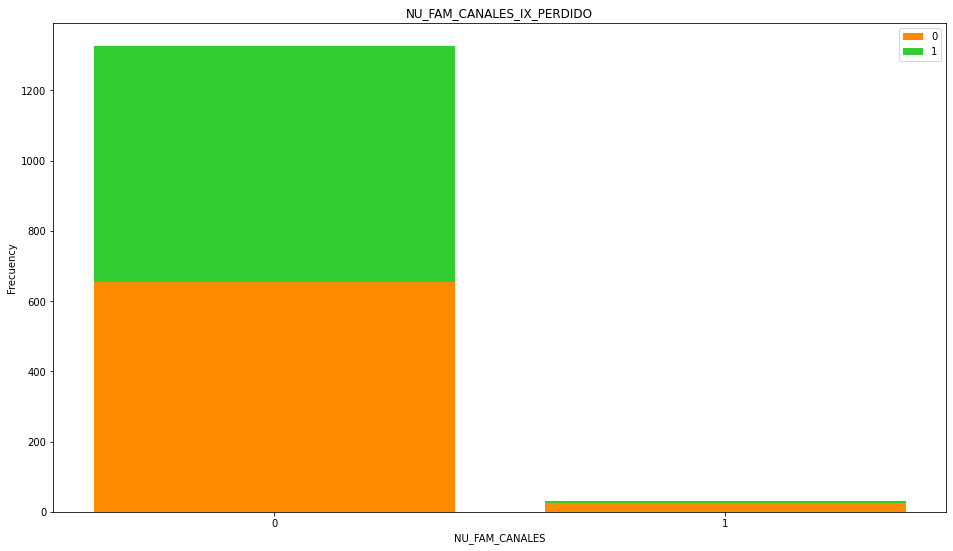

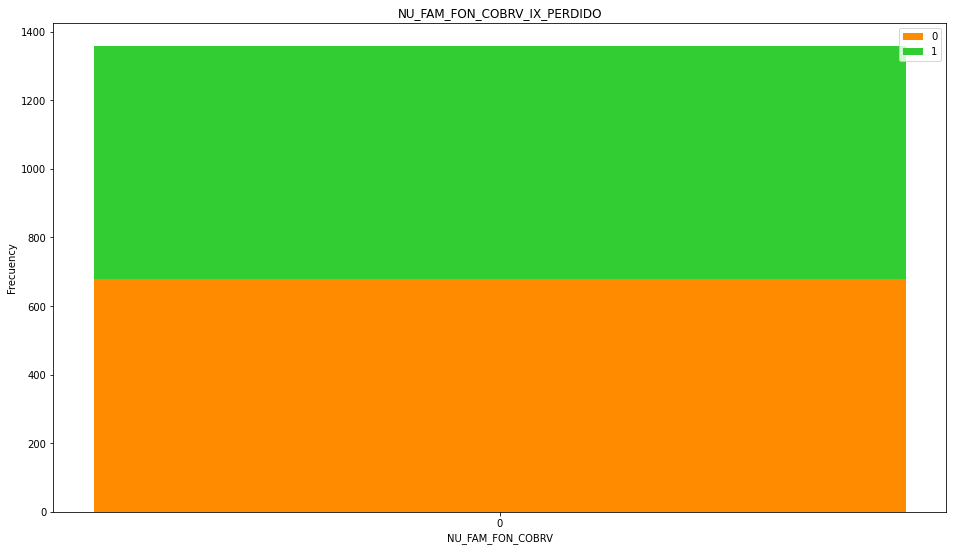

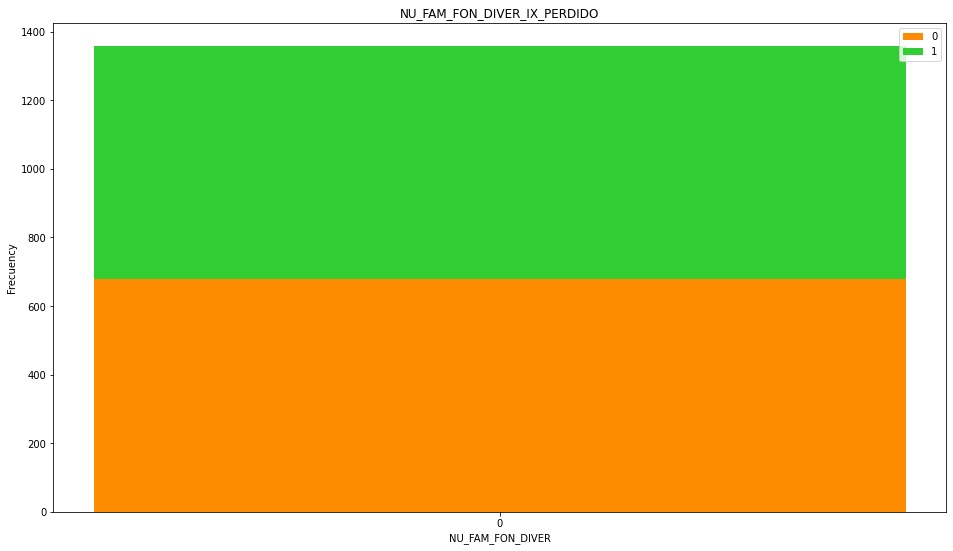

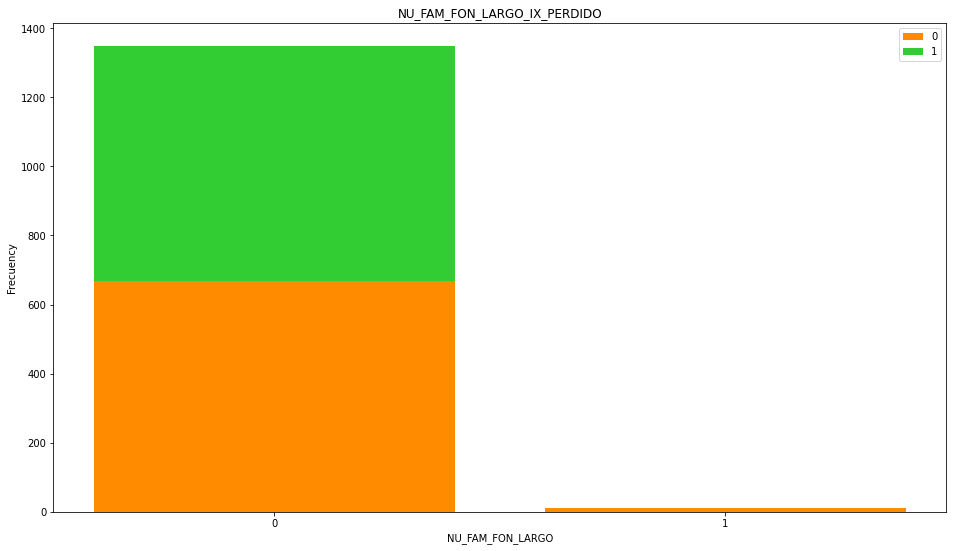

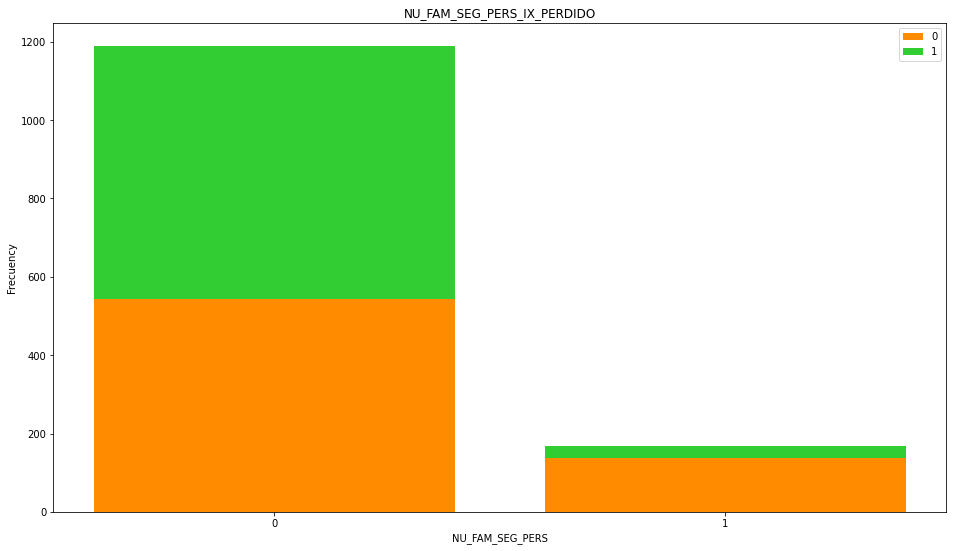

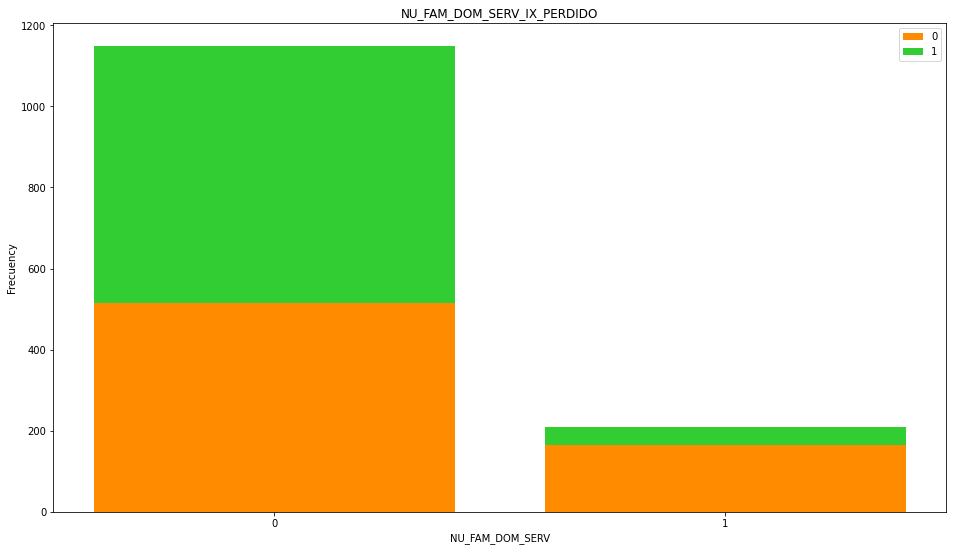

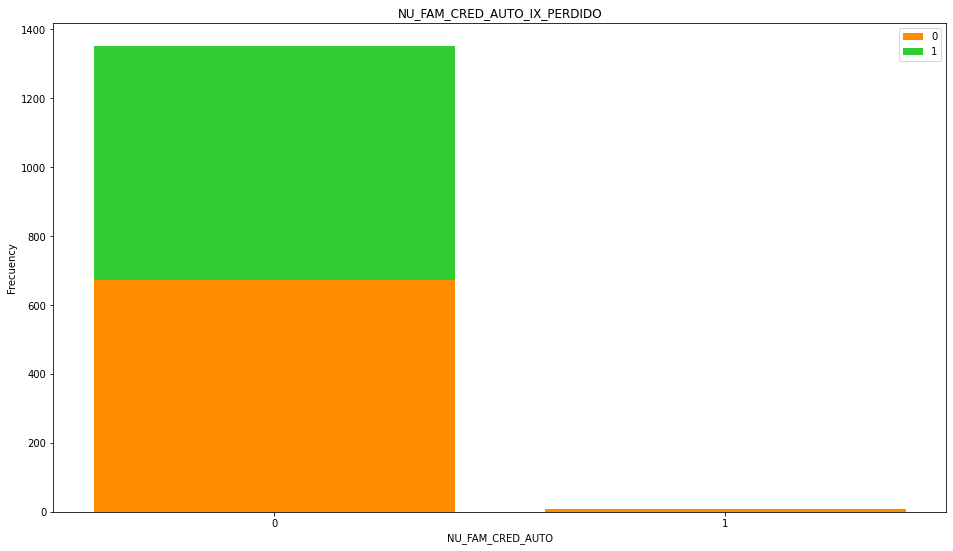

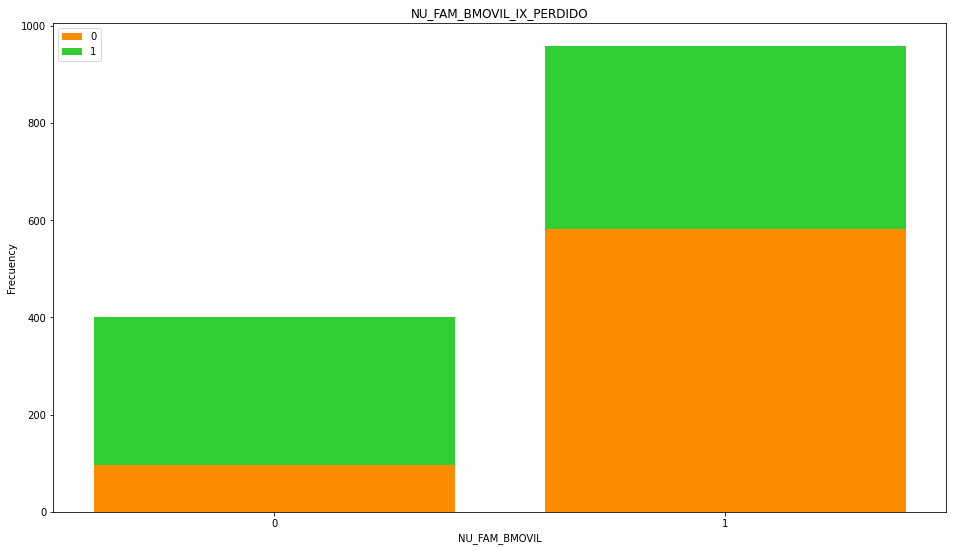

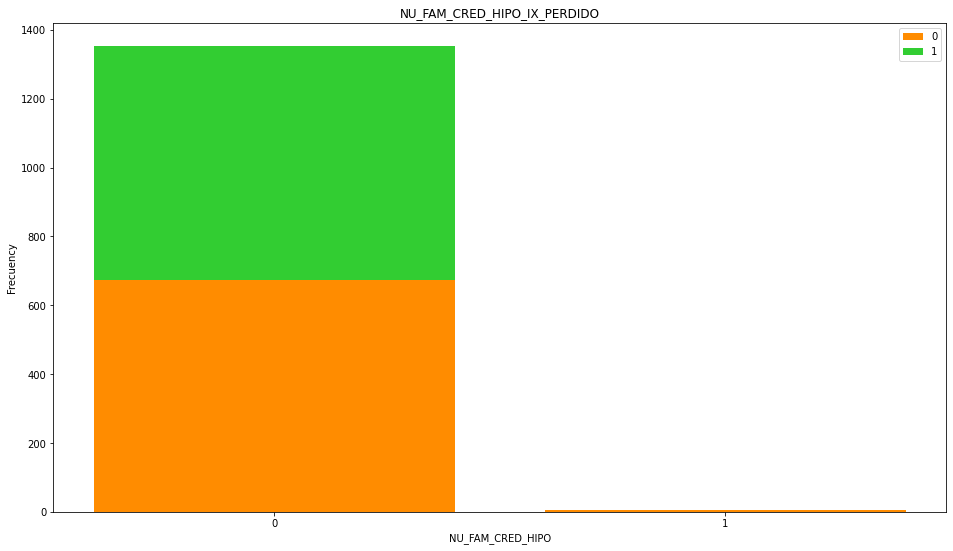

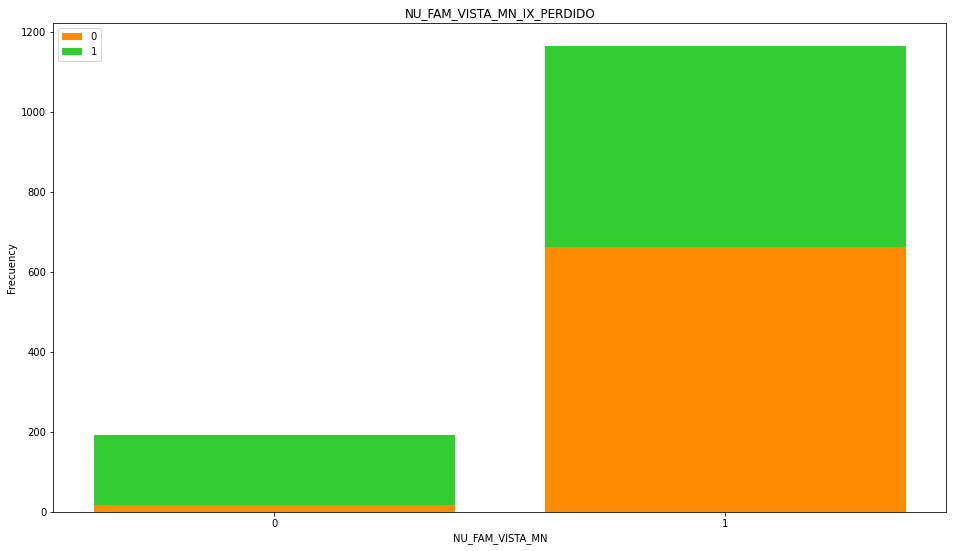

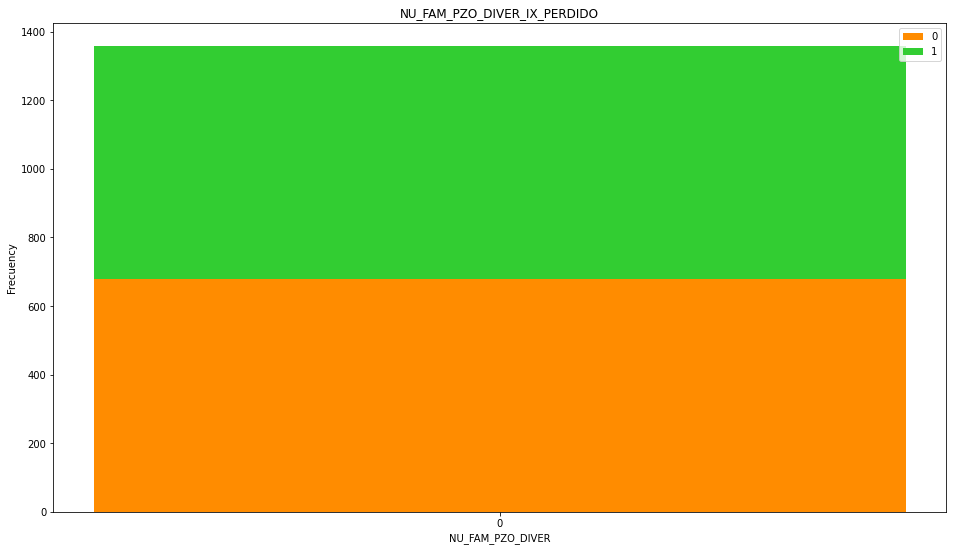

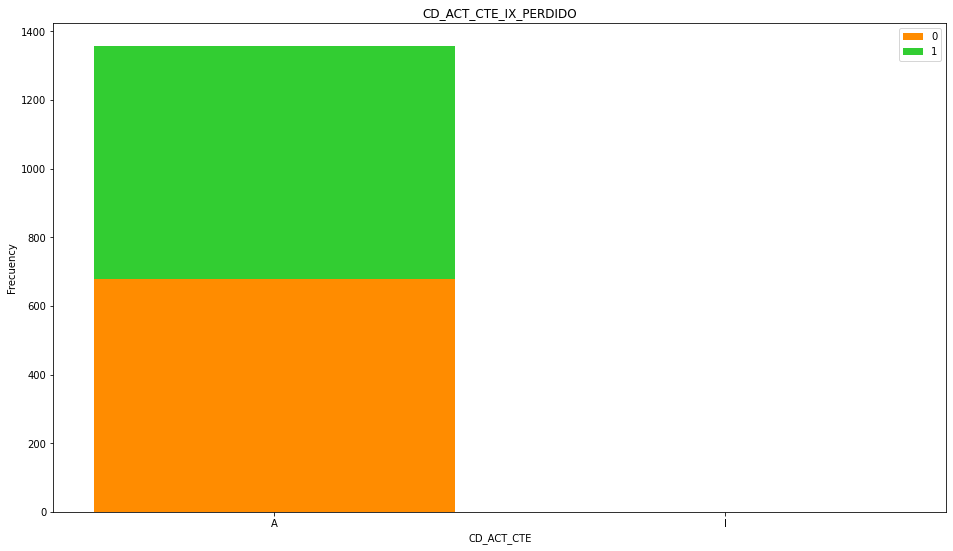

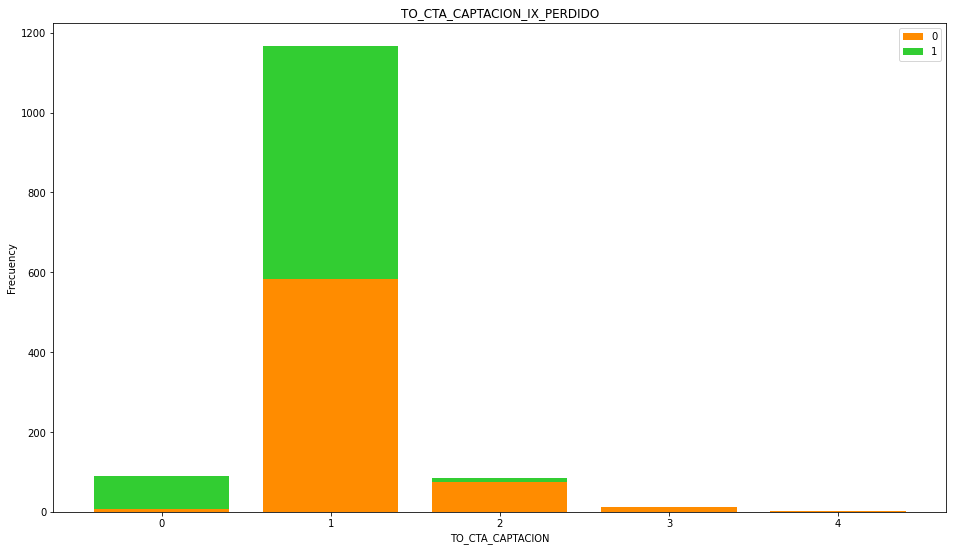

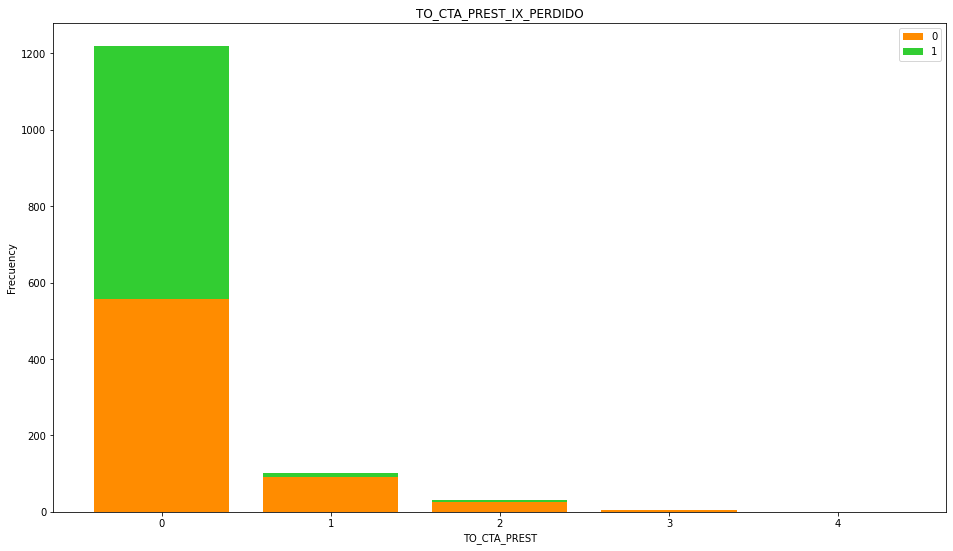

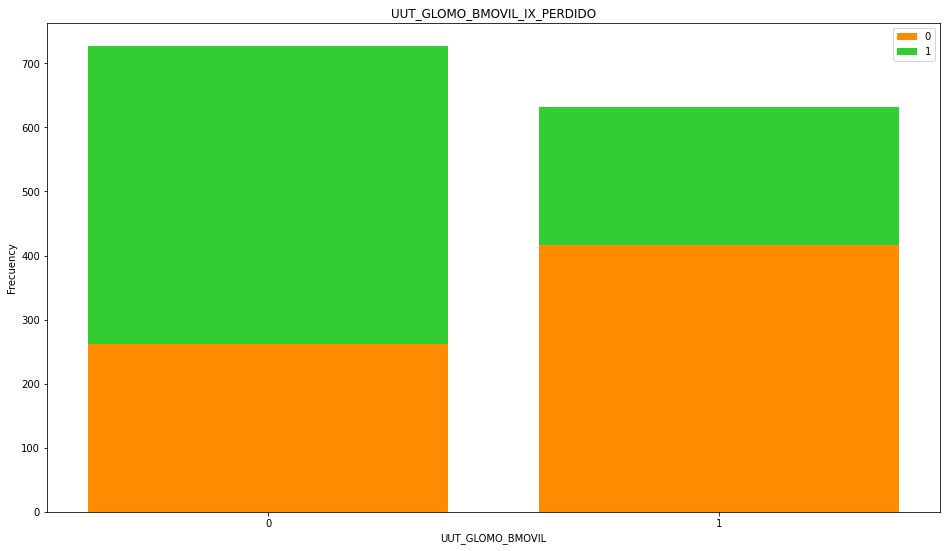

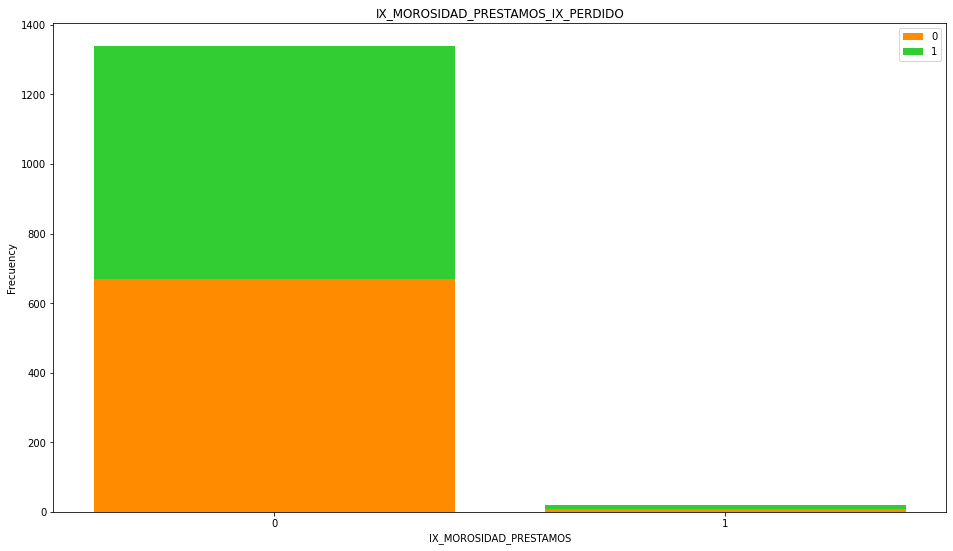

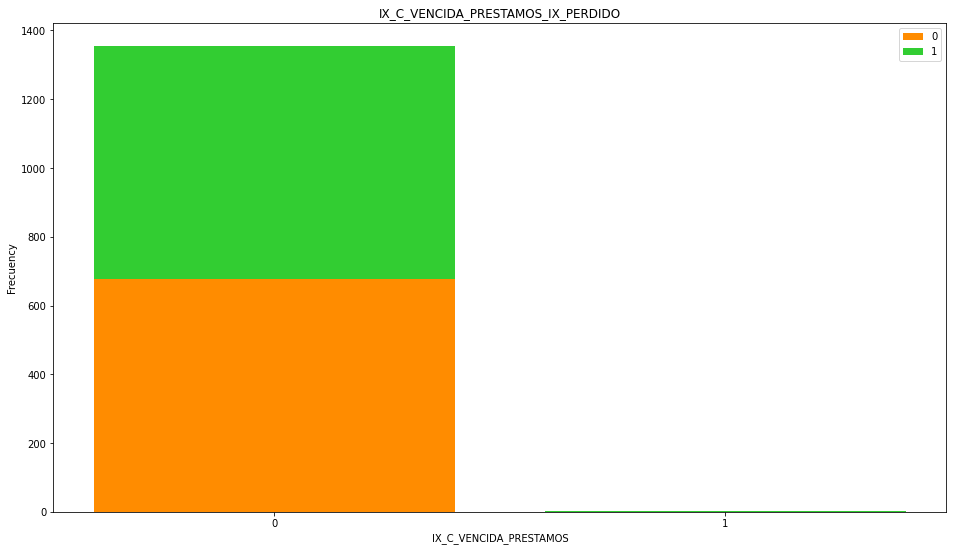

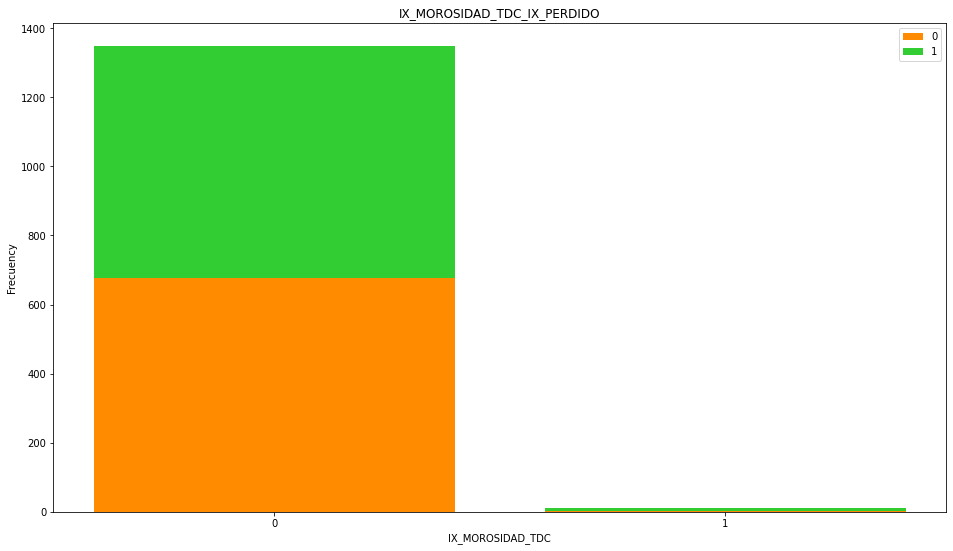

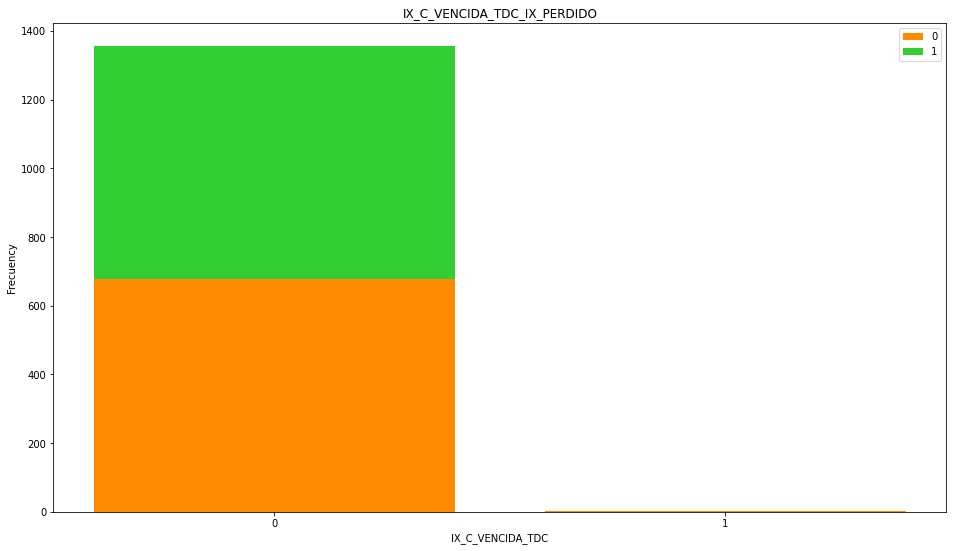

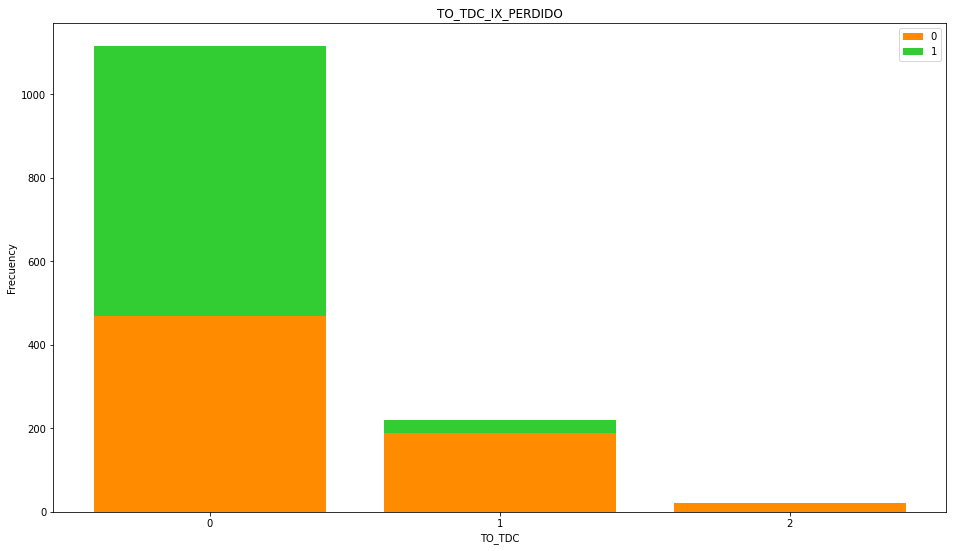

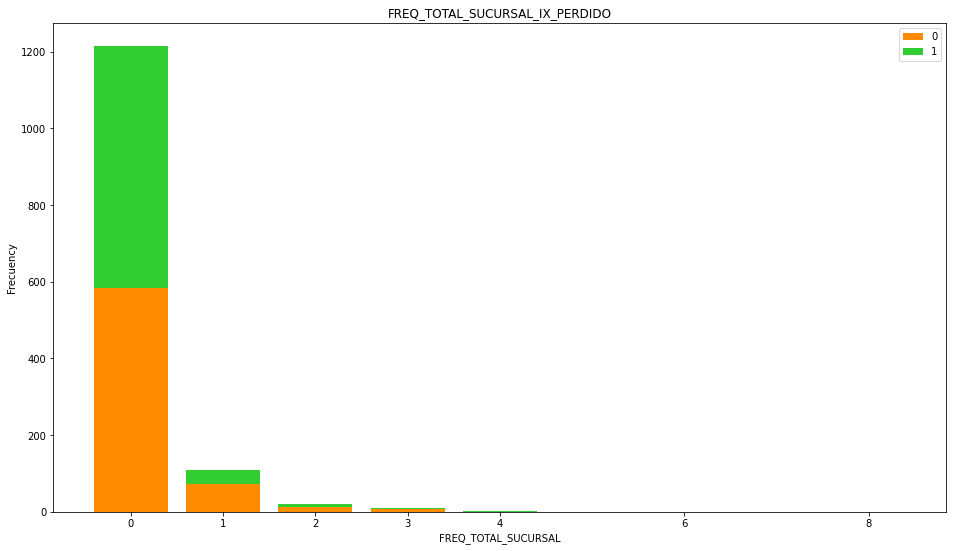

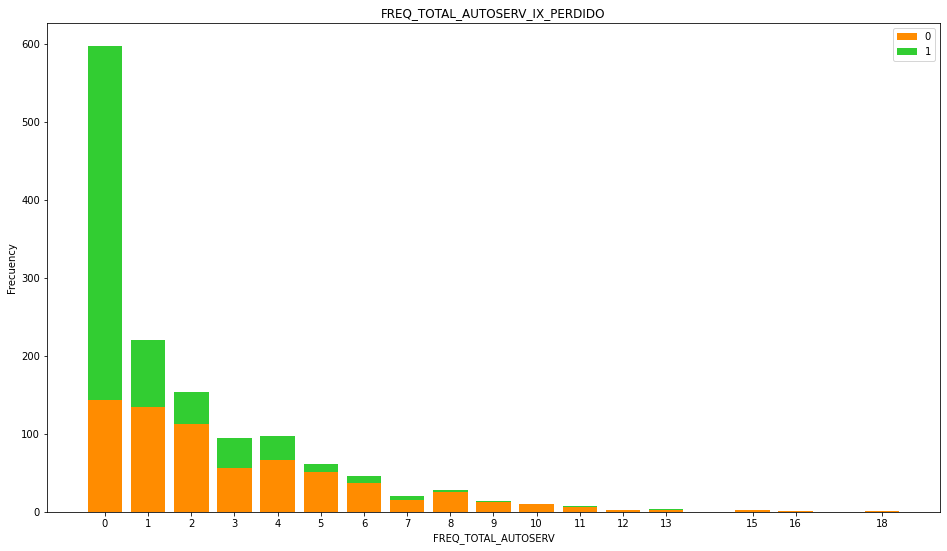

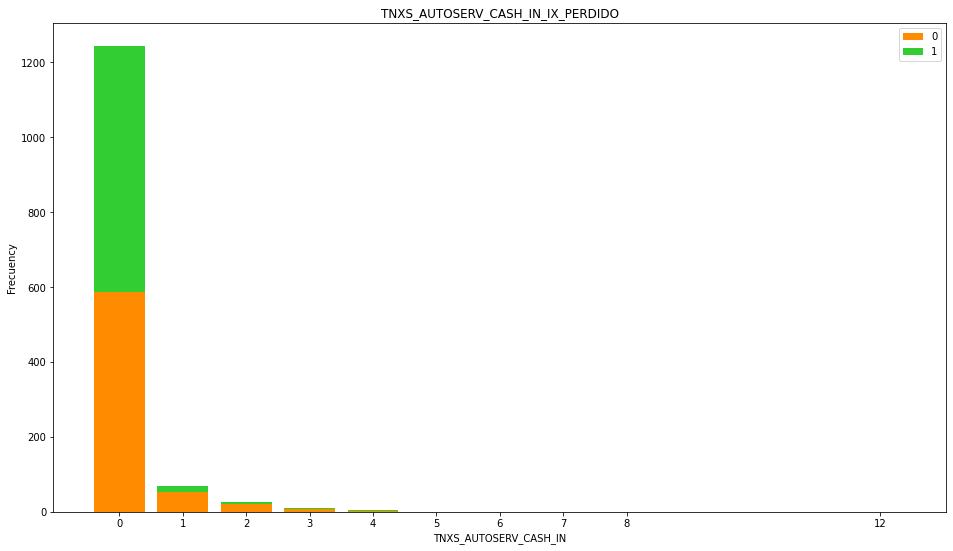

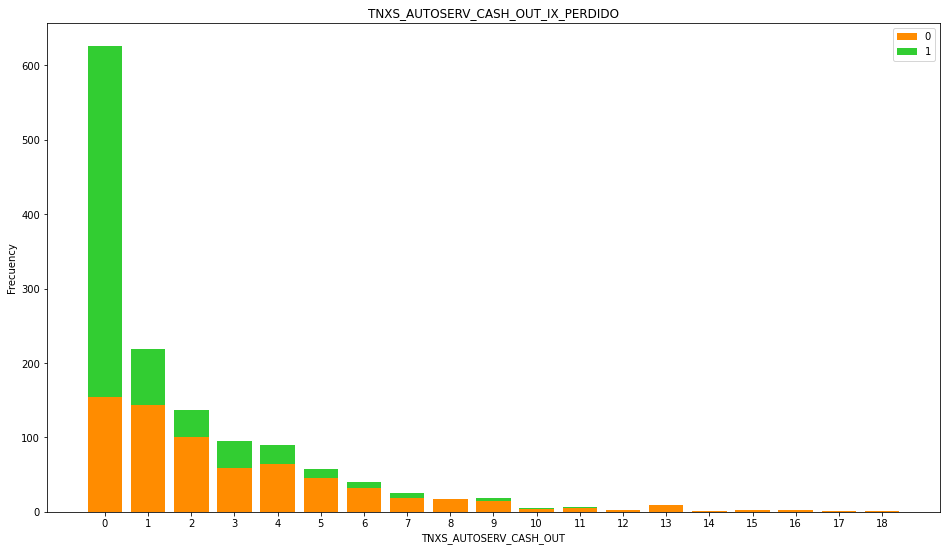

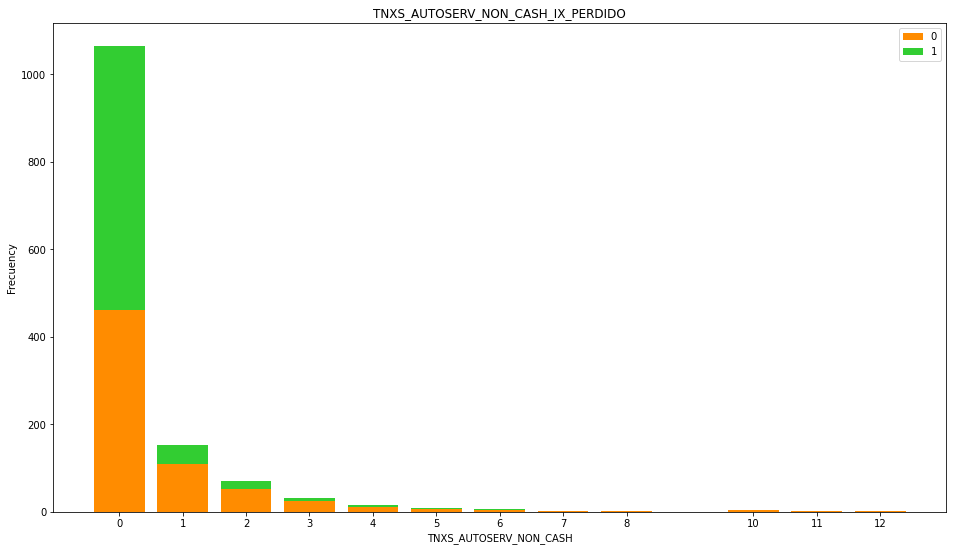

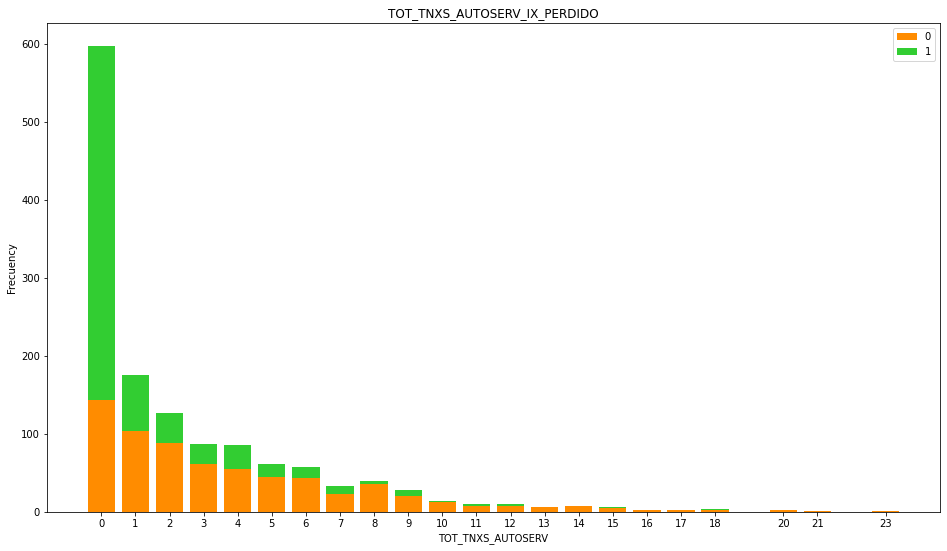

In [ ]:
for j in var_graf:
    cross_grafica(data_balanced,j,'IX_PERDIDO')

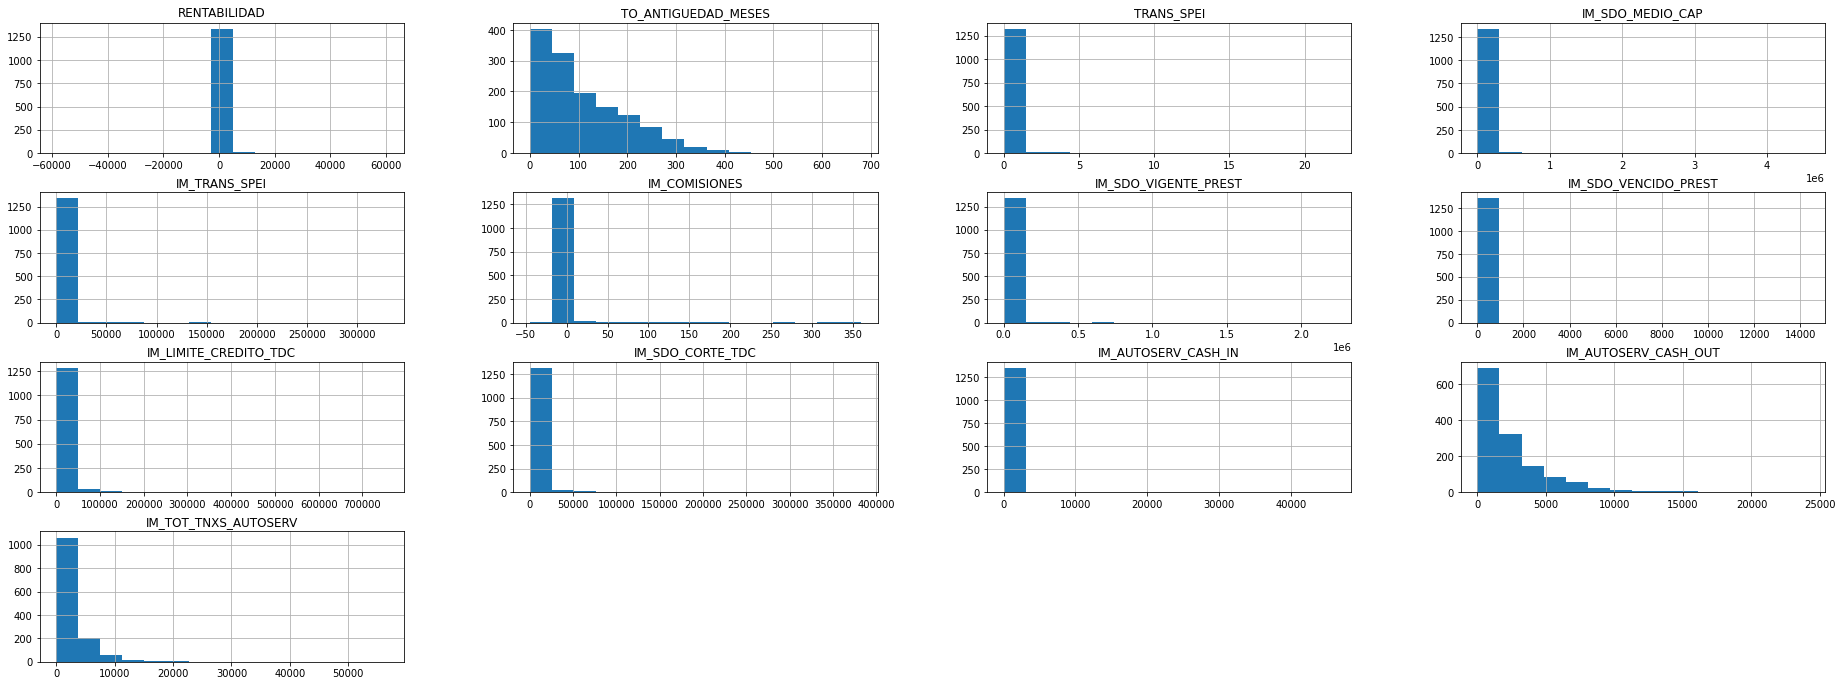

In [ ]:
data_balanced[var_graf2].hist(bins=15, figsize=(32, 18), layout=(6, 4))
plt.show()

# Normalización de lo Datos

In [ ]:
#Ya que viendo los datos balancedos podemos ver que hay datos que no tienen valores diferentes por lo que vamos a elimnar estas columnas
lista_auxiliar_2 = ['NU_FAM_PZO_DIVER','NU_FAM_FON_DIVER','NU_FAM_FON_COBRV']
data.drop(lista_auxiliar_2,inplace=True,axis=1)

#Además quitamos las columnas que solo poseen un valor en la Data completa
col_1_valor = []
for j in data.columns:
    if data[j].nunique() == 1:
        col_1_valor.append(j)


data.drop(col_1_valor,axis=1,inplace=True)

In [ ]:
lista_auxiliar_3 = []
for j in data.columns:
    print(j)
    print(data[j].nunique())
    print('_'*64)
    if data[j].nunique() > 10:
        lista_auxiliar_3.append(j)

IX_PERDIDO
2
________________________________________________________________
GENERO
2
________________________________________________________________
TO_ANTIGUEDAD_MESES
511
________________________________________________________________
GENERACION
6
________________________________________________________________
SGTO_FINAL
7
________________________________________________________________
MAX_VINC_24M
12
________________________________________________________________
IX_NOMINA
2
________________________________________________________________
RENTABILIDAD
24685
________________________________________________________________
NU_VINCULACION
12
________________________________________________________________
NU_FAM_CRED_CONS
2
________________________________________________________________
NU_FAM_PZO_BASICO
2
________________________________________________________________
NU_FAM_CRED_REV
2
________________________________________________________________
NU_FAM_FON_CORTO
2
_______

In [ ]:
for j in data.columns:
    print(j)
    print(data[j].unique())
    print('_'*64)

IX_PERDIDO
[0 1]
________________________________________________________________
GENERO
['FEMENINO' 'MASCULINO']
________________________________________________________________
TO_ANTIGUEDAD_MESES
[156. 159. 211. 168. 241. 220. 371. 160. 376. 233. 180. 173. 131. 339.
 124. 203. 280. 223. 125. 222. 190. 176. 157. 284. 189. 218. 229. 183.
 217. 191. 177. 255. 257. 158. 186. 232. 171. 170. 172. 135. 202. 261.
 331. 369. 175. 152. 209. 215. 154. 207. 487. 196. 163. 235. 259. 187.
 145. 214. 182. 199. 148. 181. 201. 174. 178. 247. 165. 231. 316. 169.
 192. 236. 286. 317. 347. 266. 185. 193. 161. 227. 242. 354. 167. 213.
 237. 122. 529. 510. 239. 224.  84. 149. 166. 270. 162. 164. 245. 254.
 150. 260. 281. 285. 153. 155. 252. 102. 133. 216. 264. 118. 290. 205.
 348. 225. 204. 184. 312. 287. 226. 194. 288. 246. 267. 179. 210. 364.
 277. 428. 115. 208. 147. 141. 368. 337. 138. 256. 307. 271. 358. 142.
 105. 414. 200. 499. 248. 319. 353. 139. 249. 274. 206. 289. 146. 188.
 137. 269. 244. 302.

In [ ]:
#La antiguedad en meses la vamos a pasar años donde si no se cumple el primer año tendran un 0, 15 meses 1 y asi sucesivamente
#data['TO_ANTIGUEDAD_MESES'] = data['TO_ANTIGUEDAD_MESES']//12

#La rentabilidad vamos a dividirla en segmentos de 10,000
#data['RENTABILIDAD'] = data['RENTABILIDAD'] // 20000

#TRANS_SPEI vamos a dividirla en segmentos de 10
#data['TRANS_SPEI'] = data['TRANS_SPEI'] // 10

#TO_CTA_CAPTACION vamos a dividirla en segmentos de 10
#data['TO_CTA_CAPTACION'] = data['TO_CTA_CAPTACION'] // 10

#
#data['IM_SDO_MEDIO_CAP'] = data['IM_SDO_MEDIO_CAP']/1000000
#data['IM_TRANS_SPEI'] = data['IM_TRANS_SPEI']/1000000
#data['IM_SDO_VIGENTE_PREST'] = data['IM_SDO_VIGENTE_PREST']/1000000
#data['IM_LIMITE_CREDITO_TDC'] = data['IM_LIMITE_CREDITO_TDC']/1000000


#FREQ_TOTAL_SUCURSAL vamos dividirla en segmentos de 5 visitas en la sucursal
#data['FREQ_TOTAL_SUCURSAL'] = data['FREQ_TOTAL_SUCURSAL'] // 5

#FREQ_TOTAL_AUTOSERV vamos a dividirla en segmentos de 5 visitas al auto servicio
#data['FREQ_TOTAL_AUTOSERV'] = data['FREQ_TOTAL_AUTOSERV'] // 5

#TNXS_AUTOSERV_CASH_IN vamos dividirla en segmentos de 5
#data['TNXS_AUTOSERV_CASH_IN'] = data['TNXS_AUTOSERV_CASH_IN'] // 5

#TNXS_AUTOSERV_CASH_OUT vamos a dividirla en segmentos de 5
#data['TNXS_AUTOSERV_CASH_OUT'] = data['TNXS_AUTOSERV_CASH_OUT'] // 5

#TNXS_AUTOSERV_NON_CASH vamos a dividirla en segmentos de 5
#data['TNXS_AUTOSERV_NON_CASH'] = data['TNXS_AUTOSERV_NON_CASH'] // 5

#TOT_TNXS_AUTOSERV vamos a dividirla en segmentos de 10
#data['TOT_TNXS_AUTOSERV'] = data['TOT_TNXS_AUTOSERV'] // 

#IM_SDO_VENCIDO_PREST vamos a segmentar en grupos de 10000
#data['IM_SDO_VENCIDO_PREST'] = data['IM_SDO_VENCIDO_PREST'] // 10000
#data['IM_SDO_CORTE_TDC'] = data['IM_SDO_CORTE_TDC']//10000

# Transformación de los datos

In [ ]:
#Transformamos los datos para poder trabajar con ellos

#Ya que las generaciones tienen un orden entonces, transformamos a datos numericos de acuerdo el orden
data['GENERACION'].replace('Generación Silenciosa',0,inplace=True)
data['GENERACION'].replace('Baby Boomers',1,inplace=True)
data['GENERACION'].replace('Generación X',2,inplace=True)
data['GENERACION'].replace('Generación Y',3,inplace=True)
data['GENERACION'].replace('Generación Z',4,inplace=True)
data['GENERACION'].replace('Generación T',5,inplace=True)

In [ ]:
data = pd.get_dummies(data,drop_first=True)
data

,IX_PERDIDO,TO_ANTIGUEDAD_MESES,GENERACION,MAX_VINC_24M,IX_NOMINA,RENTABILIDAD,NU_VINCULACION,NU_FAM_CRED_CONS,NU_FAM_PZO_BASICO,NU_FAM_CRED_REV,NU_FAM_FON_CORTO,NU_FAM_SEG_PATR,NU_FAM_DOM_TDC,NU_FAM_CANALES,NU_FAM_FON_LARGO,NU_FAM_SEG_PERS,NU_FAM_DOM_SERV,NU_FAM_CRED_AUTO,NU_FAM_BMOVIL,NU_FAM_CRED_HIPO,NU_FAM_VISTA_MN,TRANS_SPEI,TO_CTA_CAPTACION,IM_SDO_MEDIO_CAP,TO_CTA_PREST,UUT_GLOMO_BMOVIL,IX_MOROSIDAD_PRESTAMOS,IX_C_VENCIDA_PRESTAMOS,IX_MOROSIDAD_TDC,IX_C_VENCIDA_TDC,TO_TDC,IX_FRAUDE,FREQ_TOTAL_SUCURSAL,FREQ_TOTAL_AUTOSERV,TNXS_AUTOSERV_CASH_IN,TNXS_AUTOSERV_CASH_OUT,TNXS_AUTOSERV_NON_CASH,TOT_TNXS_AUTOSERV,IM_TRANS_SPEI,IM_COMISIONES,IM_SDO_VIGENTE_PREST,IM_SDO_VENCIDO_PREST,IM_LIMITE_CREDITO_TDC,IM_SDO_CORTE_TDC,IM_AUTOSERV_CASH_IN,IM_AUTOSERV_CASH_OUT,IM_TOT_TNXS_AUTOSERV,GENERO_MASCULINO,SGTO_FINAL_BANCA PATRIMONIAL,SGTO_FINAL_BANCA PERSONAL,SGTO_FINAL_BANCA PERSONAL PLUS,SGTO_FINAL_BANCARIO ALTO,SGTO_FINAL_BANCARIO BAJO,SGTO_FINAL_BANCARIO ESTANDAR,CD_ACT_CTE_I
0,0,156.0,2,6.0,1,149.89,4,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,12253.14,0,0,0,0,0,0,1,0,0,4,1,4,3,8,0.000000,0.00,0.00,0.0,20000.0,10368.705833,541.666667,6683.333333,7225.000000,0,0,0,0,1,0,0,0
1,0,156.0,1,2.0,1,-16.13,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,9388.82,0,1,0,0,0,0,0,0,0,6,1,5,1,7,5662.833333,0.00,0.00,0.0,0.0,0.000000,41.666667,1808.333333,1850.000000,0,0,0,0,0,0,1,0
2,0,156.0,3,4.0,1,-21.30,4,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,23.67,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5728.166667,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0
3,0,159.0,3,5.0,0,1304.60,5,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,1,1766.64,1,1,0,0,0,0,1,0,0,0,0,0,0,0,300.000000,279.41,4882.55,0.0,113300.0,50855.150000,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0
4,0,156.0,2,5.0,1,302.96,5,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,45504.17,0,1,0,0,0,0,1,0,0,9,0,9,1,10,1356.583333,0.00,0.00,0.0,13800.0,12516.301667,0.000000,19808.333333,19808.333333,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40610,0,96.0,3,2.0,1,-39.05,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1292.89,0,0,0,0,0,0,0,0,0,3,0,4,4,8,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,6083.333333,6083.333333,0,0,0,0,0,0,1,0
40611,0,96.0,3,1.0,1,-31.10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,93.22,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,2641.666667,2641.666667,1,0,0,0,0,1,0,0
40612,0,96.0,3,2.0,1,-4.42,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,7837.77,0,1,0,0,0,0,0,0,0,5,0,5,2,7,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,6008.333333,6008.333333,1,0,0,0,0,0,1,0
40613,0,96.0,3,2.0,1,-29.40,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,22.27,0,0,0,0,0,0,0,0,0,2,0,2,0,2,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,2166.666667,2170.833333,1,0,0,0,0,0,0,0


# Outliers

TO_ANTIGUEDAD_MESES


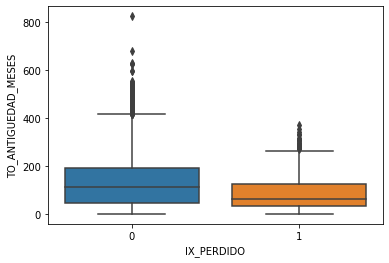

MAX_VINC_24M


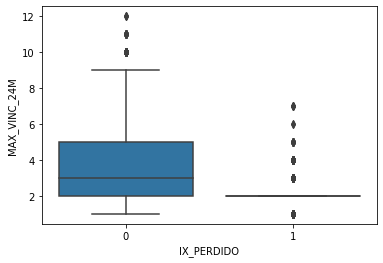

RENTABILIDAD


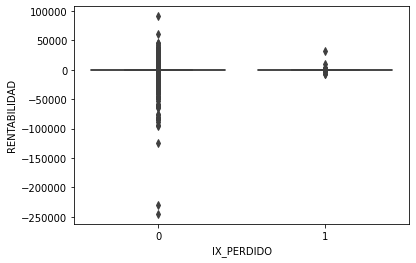

NU_VINCULACION


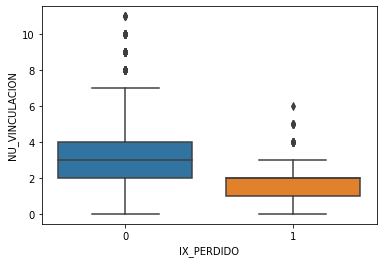

TRANS_SPEI


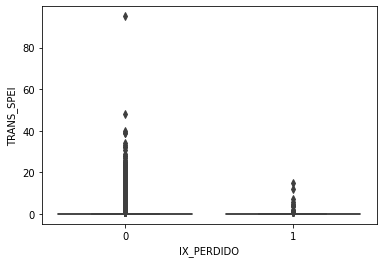

TO_CTA_CAPTACION


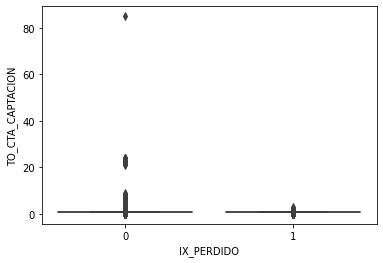

IM_SDO_MEDIO_CAP


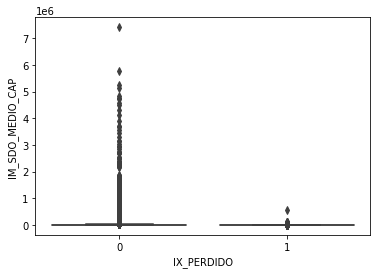

FREQ_TOTAL_SUCURSAL


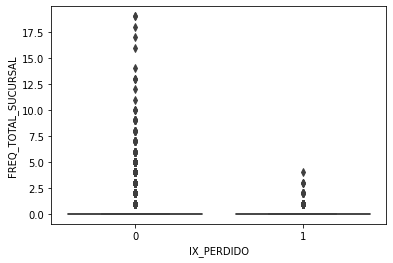

FREQ_TOTAL_AUTOSERV


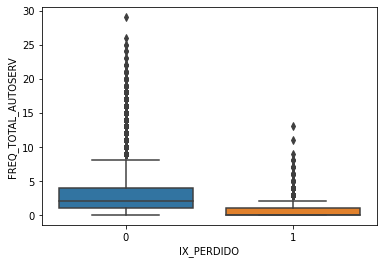

TNXS_AUTOSERV_CASH_IN


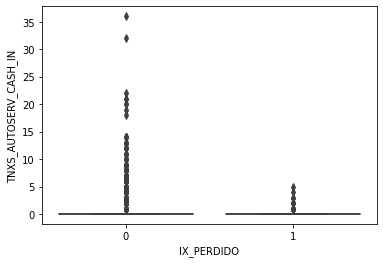

TNXS_AUTOSERV_CASH_OUT


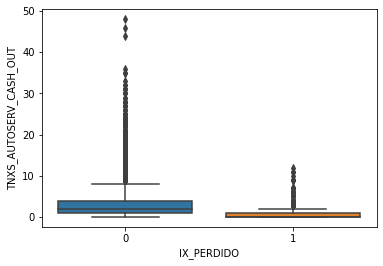

TNXS_AUTOSERV_NON_CASH


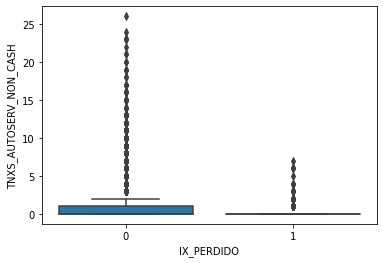

TOT_TNXS_AUTOSERV


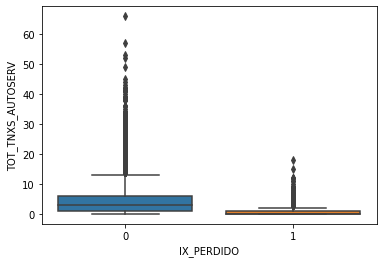

IM_TRANS_SPEI


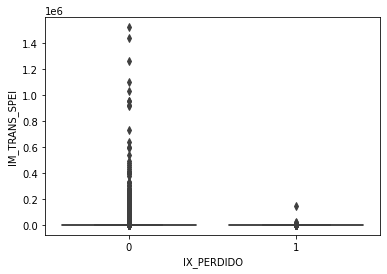

IM_COMISIONES


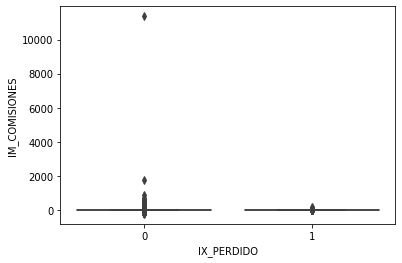

IM_SDO_VIGENTE_PREST


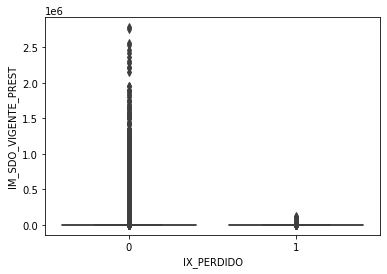

IM_SDO_VENCIDO_PREST


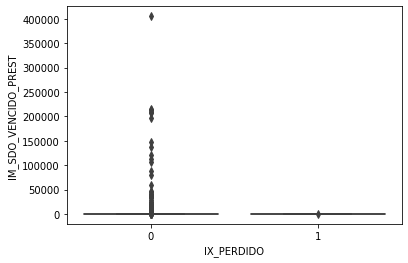

IM_LIMITE_CREDITO_TDC


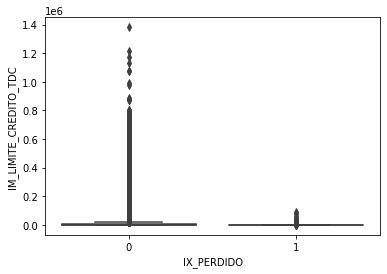

IM_SDO_CORTE_TDC


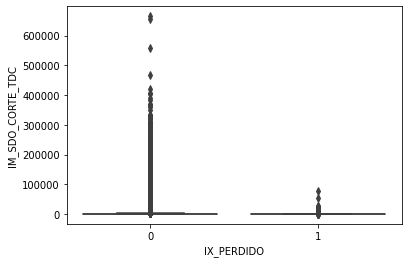

IM_AUTOSERV_CASH_IN


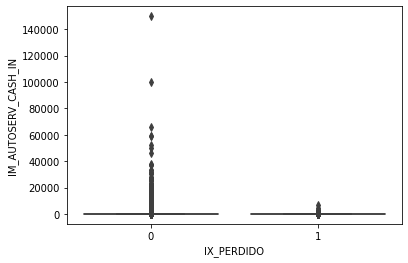

IM_AUTOSERV_CASH_OUT


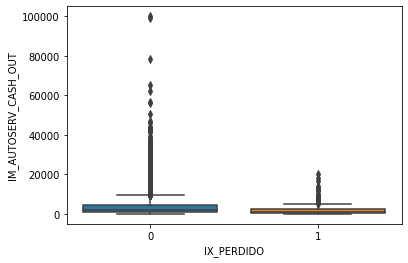

IM_TOT_TNXS_AUTOSERV


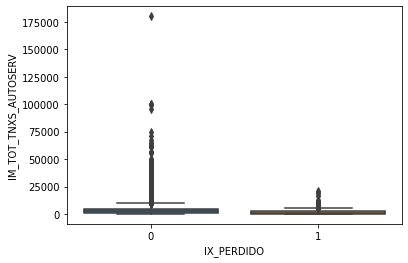

In [ ]:
for j in lista_auxiliar_3:
    print(j)
    sns.boxplot(data=data, x = 'IX_PERDIDO',y=j)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
data

,IX_PERDIDO,TO_ANTIGUEDAD_MESES,GENERACION,MAX_VINC_24M,IX_NOMINA,RENTABILIDAD,NU_VINCULACION,NU_FAM_CRED_CONS,NU_FAM_PZO_BASICO,NU_FAM_CRED_REV,NU_FAM_FON_CORTO,NU_FAM_SEG_PATR,NU_FAM_DOM_TDC,NU_FAM_CANALES,NU_FAM_FON_LARGO,NU_FAM_SEG_PERS,NU_FAM_DOM_SERV,NU_FAM_CRED_AUTO,NU_FAM_BMOVIL,NU_FAM_CRED_HIPO,NU_FAM_VISTA_MN,TRANS_SPEI,TO_CTA_CAPTACION,IM_SDO_MEDIO_CAP,TO_CTA_PREST,UUT_GLOMO_BMOVIL,IX_MOROSIDAD_PRESTAMOS,IX_C_VENCIDA_PRESTAMOS,IX_MOROSIDAD_TDC,IX_C_VENCIDA_TDC,TO_TDC,IX_FRAUDE,FREQ_TOTAL_SUCURSAL,FREQ_TOTAL_AUTOSERV,TNXS_AUTOSERV_CASH_IN,TNXS_AUTOSERV_CASH_OUT,TNXS_AUTOSERV_NON_CASH,TOT_TNXS_AUTOSERV,IM_TRANS_SPEI,IM_COMISIONES,IM_SDO_VIGENTE_PREST,IM_SDO_VENCIDO_PREST,IM_LIMITE_CREDITO_TDC,IM_SDO_CORTE_TDC,IM_AUTOSERV_CASH_IN,IM_AUTOSERV_CASH_OUT,IM_TOT_TNXS_AUTOSERV,GENERO_MASCULINO,SGTO_FINAL_BANCA PATRIMONIAL,SGTO_FINAL_BANCA PERSONAL,SGTO_FINAL_BANCA PERSONAL PLUS,SGTO_FINAL_BANCARIO ALTO,SGTO_FINAL_BANCARIO BAJO,SGTO_FINAL_BANCARIO ESTANDAR,CD_ACT_CTE_I
0,0,156.0,2,6.0,1,149.89,4,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,12253.14,0,0,0,0,0,0,1,0,0,4,1,4,3,8,0.000000,0.00,0.00,0.0,20000.0,10368.705833,541.666667,6683.333333,7225.000000,0,0,0,0,1,0,0,0
1,0,156.0,1,2.0,1,-16.13,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,9388.82,0,1,0,0,0,0,0,0,0,6,1,5,1,7,5662.833333,0.00,0.00,0.0,0.0,0.000000,41.666667,1808.333333,1850.000000,0,0,0,0,0,0,1,0
2,0,156.0,3,4.0,1,-21.30,4,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,23.67,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5728.166667,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0
3,0,159.0,3,5.0,0,1304.60,5,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,1,1766.64,1,1,0,0,0,0,1,0,0,0,0,0,0,0,300.000000,279.41,4882.55,0.0,113300.0,50855.150000,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0
4,0,156.0,2,5.0,1,302.96,5,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,45504.17,0,1,0,0,0,0,1,0,0,9,0,9,1,10,1356.583333,0.00,0.00,0.0,13800.0,12516.301667,0.000000,19808.333333,19808.333333,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40610,0,96.0,3,2.0,1,-39.05,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1292.89,0,0,0,0,0,0,0,0,0,3,0,4,4,8,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,6083.333333,6083.333333,0,0,0,0,0,0,1,0
40611,0,96.0,3,1.0,1,-31.10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,93.22,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,2641.666667,2641.666667,1,0,0,0,0,1,0,0
40612,0,96.0,3,2.0,1,-4.42,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,7837.77,0,1,0,0,0,0,0,0,0,5,0,5,2,7,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,6008.333333,6008.333333,1,0,0,0,0,0,1,0
40613,0,96.0,3,2.0,1,-29.40,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,22.27,0,0,0,0,0,0,0,0,0,2,0,2,0,2,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,2166.666667,2170.833333,1,0,0,0,0,0,0,0


In [ ]:
data.to_csv('datalimpia')

In [ ]:
X = data.iloc[:,1:].to_numpy(dtype=np.float64)
y = data.iloc[:,0].to_numpy(dtype=np.int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True, stratify=y)
#X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test,train_size=0.5,random_state=10,shuffle=True, stratify=y_test)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#X_valid_std = sc.transform(X_valid)

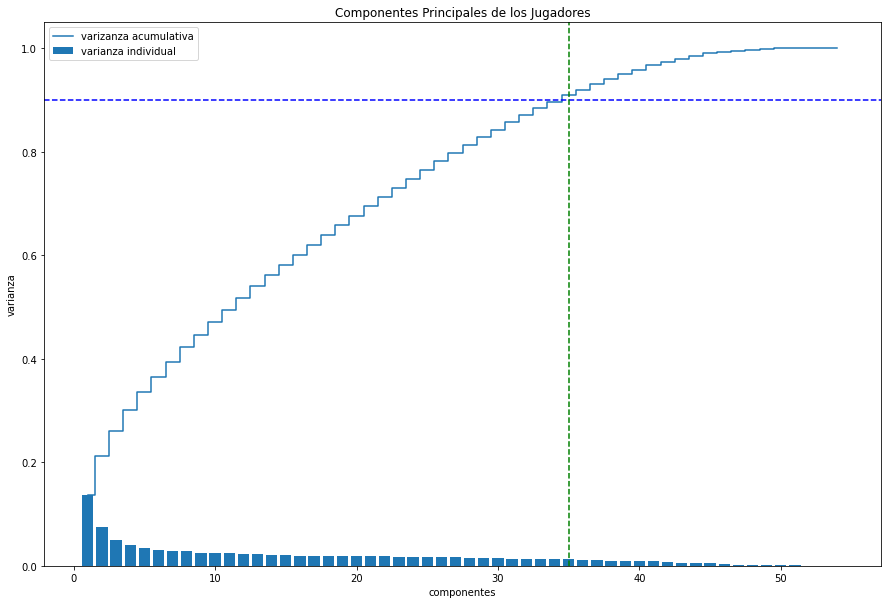

In [ ]:
from sklearn.decomposition import PCA
#Graficamos la varianza de las componentes principales para decidir cuantas usar

#Estandarizamos los datos de entrenamiento
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train)

#Estandarizamos los datos de prueba
#X_test_std = sc.transform(X_test)

#Sacamos Matriz de Covarianza
cov_mat = np.cov(X_train_std.T)

#Sacamos eigenvalores e eigenvectores de la matriz de covarianza
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)

#Ordenamos los eigenvalores de acuerdo a su magnitud
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#Creamos la grafica de la varianza de las componentes principales
plt.figure(figsize=(15,10))
plt.bar(range(1,X_train.shape[1]+1),var_exp, label="varianza individual", align = "center") 
plt.step(range(1,X_train.shape[1]+1), cum_var_exp, where="mid", label="varizanza acumulativa") 
plt.axhline(y=0.9,color='blue', linestyle='--')
plt.axvline(x=35,color='green', linestyle='--')
plt.xlabel("componentes")
plt.ylabel("varianza")
plt.title("Componentes Principales de los Jugadores")
plt.legend(loc = "best")
plt.show()                     

In [ ]:
pca = PCA(n_components=35)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#X_valid_pca = pca.transform(X_valid_std)

In [ ]:
from sklearn.model_selection import GridSearchCV

Knn = KNeighborsClassifier()

vecinos = [j for j in range(2,10)]

param_grid = {'n_neighbors':vecinos,
              'weights':['uniform','distance']}

gs = GridSearchCV(estimator = Knn,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='accuracy')

gs.fit(X_train_pca,y_train)
print('El mejor score fue: \n',gs.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs.best_params_)

El mejor score fue: 
 0.9836792219168702
________________________________________________________________
Los parametros para ese score fue: 
 {'n_neighbors': 6, 'weights': 'uniform'}


In [ ]:
Knn = KNeighborsClassifier()

vecinos = [j for j in range(2,10)]

param_grid = {'n_neighbors':vecinos,
              'weights':['uniform','distance']}

gs = GridSearchCV(estimator = Knn,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='recall')

gs.fit(X_train_pca,y_train)
print('El mejor score fue: \n',gs.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs.best_params_)

El mejor score fue: 
 0.16201395812562314
________________________________________________________________
Los parametros para ese score fue: 
 {'n_neighbors': 2, 'weights': 'distance'}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Knn = KNeighborsClassifier(n_neighbors=6,weights='uniform')
Knn.fit(X_train_pca,y_train)
y_pred = Knn.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11964    17]
 [  192    12]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11981
           1       0.41      0.06      0.10       204

    accuracy                           0.98     12185
   macro avg       0.70      0.53      0.55     12185
weighted avg       0.97      0.98      0.98     12185



In [ ]:
data_1 = data[data['IX_PERDIDO'] == 1]
data_0 = data[data['IX_PERDIDO'] == 0].sample(n=data_1.shape[0],random_state=10)
data_balanced = pd.concat([data_0,data_1])
data_balanced

,IX_PERDIDO,TO_ANTIGUEDAD_MESES,GENERACION,MAX_VINC_24M,IX_NOMINA,RENTABILIDAD,NU_VINCULACION,NU_FAM_CRED_CONS,NU_FAM_PZO_BASICO,NU_FAM_CRED_REV,NU_FAM_FON_CORTO,NU_FAM_SEG_PATR,NU_FAM_DOM_TDC,NU_FAM_CANALES,NU_FAM_FON_LARGO,NU_FAM_SEG_PERS,NU_FAM_DOM_SERV,NU_FAM_CRED_AUTO,NU_FAM_BMOVIL,NU_FAM_CRED_HIPO,NU_FAM_VISTA_MN,TRANS_SPEI,TO_CTA_CAPTACION,IM_SDO_MEDIO_CAP,TO_CTA_PREST,UUT_GLOMO_BMOVIL,IX_MOROSIDAD_PRESTAMOS,IX_C_VENCIDA_PRESTAMOS,IX_MOROSIDAD_TDC,IX_C_VENCIDA_TDC,TO_TDC,IX_FRAUDE,FREQ_TOTAL_SUCURSAL,FREQ_TOTAL_AUTOSERV,TNXS_AUTOSERV_CASH_IN,TNXS_AUTOSERV_CASH_OUT,TNXS_AUTOSERV_NON_CASH,TOT_TNXS_AUTOSERV,IM_TRANS_SPEI,IM_COMISIONES,IM_SDO_VIGENTE_PREST,IM_SDO_VENCIDO_PREST,IM_LIMITE_CREDITO_TDC,IM_SDO_CORTE_TDC,IM_AUTOSERV_CASH_IN,IM_AUTOSERV_CASH_OUT,IM_TOT_TNXS_AUTOSERV,GENERO_MASCULINO,SGTO_FINAL_BANCA PATRIMONIAL,SGTO_FINAL_BANCA PERSONAL,SGTO_FINAL_BANCA PERSONAL PLUS,SGTO_FINAL_BANCARIO ALTO,SGTO_FINAL_BANCARIO BAJO,SGTO_FINAL_BANCARIO ESTANDAR,CD_ACT_CTE_I
28190,0,237.0,1,9.0,1,10680.36,9,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,25023.03,3,1,0,0,0,0,2,0,0,15,1,16,0,17,17408.750000,0.0,272494.434167,0.0,359400.0,308951.174167,975.0,19091.666667,20066.666667,1,0,0,1,0,0,0,0
25120,0,96.0,1,1.0,1,-40.96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,597.62,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1308.333333,1308.333333,0,0,0,0,0,0,0,0
19220,0,52.0,3,3.0,1,-92.75,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1399.37,0,1,0,0,0,0,0,0,0,10,0,14,0,14,926.166667,0.0,0.000000,0.0,0.0,0.000000,0.0,5358.333333,5358.333333,0,0,0,0,0,0,1,0
32678,0,137.0,1,2.0,1,129.25,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,64176.61,0,1,0,0,0,0,0,0,6,1,0,1,0,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1766.666667,1766.666667,1,0,0,0,0,0,1,0
27575,0,104.0,3,3.0,1,-50.38,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,6801.29,0,1,0,0,0,0,0,0,1,5,0,5,0,5,16202.833333,0.0,0.000000,0.0,0.0,0.000000,662.5,5641.666667,6304.166667,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40365,1,96.0,3,2.0,1,-20.04,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,29.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,591.666667,0.0,0.000000,0.0,0.0,0.000000,0.0,83.333333,83.333333,1,0,0,0,0,0,0,0
40393,1,96.0,3,1.0,1,-20.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1966.666667,1966.666667,1,0,0,0,0,0,0,0
40448,1,95.0,3,2.0,1,-20.12,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,11.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,900.000000,900.000000,0,0,0,0,0,1,0,0
40465,1,97.0,3,2.0,1,-27.43,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,46.99,0,0,0,0,0,0,0,0,0,2,0,2,4,6,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,3083.333333,3083.333333,1,0,0,0,0,0,0,0


In [ ]:
X_b = data_balanced.iloc[:,1:].to_numpy(dtype=np.float64)
y_b = data_balanced.iloc[:,0].to_numpy(dtype=np.int32)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b,y_b,test_size=0.3,random_state=10,shuffle=True, stratify=y_b)

sc_b = StandardScaler()
X_train_std_b = sc.fit_transform(X_train_b)
X_test_std_b = sc.transform(X_test_b)

pca_b = PCA(n_components=35)
X_train_pca_b = pca_b.fit_transform(X_train_std_b)
X_test_pca_b = pca_b.transform(X_test_std_b)

In [ ]:
Knn_ = KNeighborsClassifier()

vecinos = [j for j in range(2,10)]

param_grid = {'n_neighbors':vecinos,
              'weights':['uniform','distance'],
              'p':[j for j in range(1,5)]}

gs_b = GridSearchCV(estimator = Knn_,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='accuracy')

gs_b.fit(X_train_pca_b,y_train_b)
print('El mejor score fue: \n',gs_b.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs_b.best_params_)

El mejor score fue: 
 0.7336586533347517
________________________________________________________________
Los parametros para ese score fue: 
 {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [ ]:
Knn_ = KNeighborsClassifier()

vecinos = [j for j in range(2,10)]

param_grid = {'n_neighbors':vecinos,
              'weights':['uniform','distance'],
              'p':[j for j in range(1,5)]}

gs_b = GridSearchCV(estimator = Knn_,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='recall')

gs_b.fit(X_train_pca_b,y_train_b)
print('El mejor score fue: \n',gs_b.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs_b.best_params_)

El mejor score fue: 
 0.7936725537672696
________________________________________________________________
Los parametros para ese score fue: 
 {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [ ]:
Knn = KNeighborsClassifier(n_neighbors=9,weights='uniform')
Knn.fit(X_train_pca_b,y_train_b)
y_pred_b = Knn.predict(X_test_pca_b)

print(confusion_matrix(y_test_b, y_pred_b))
print(classification_report(y_test_b, y_pred_b))

[[151  53]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       204
           1       0.74      0.75      0.75       204

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [ ]:
LR = LogisticRegression(random_state=10,max_iter=200,tol=0.01)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

C = [0.5,1.0,1.5,2.0]

param_grid = {'solver':solver,
              'C':C}

gs = GridSearchCV(estimator = LR,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='accuracy')

gs.fit(X_train_pca_b,y_train_b)
print('El mejor score fue: \n',gs.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs.best_params_)

El mejor score fue: 
 0.7568742686948197
________________________________________________________________
Los parametros para ese score fue: 
 {'C': 0.5, 'solver': 'saga'}


In [ ]:
LR = LogisticRegression(random_state=10,max_iter=200,tol=0.01)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

C = [0.5,1.0,1.5,2.0]

param_grid = {'solver':solver,
              'C':C}

gs = GridSearchCV(estimator = LR,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='recall')

gs.fit(X_train_pca_b,y_train_b)
print('El mejor score fue: \n',gs.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs.best_params_)

El mejor score fue: 
 0.8357783791482695
________________________________________________________________
Los parametros para ese score fue: 
 {'C': 1.0, 'solver': 'newton-cg'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=10)

criterion = ['gini', 'entropy']
min_impurity_decrease = [0.5,1.0,1.5]


param_grid = {'criterion':criterion,
              'min_impurity_decrease':min_impurity_decrease}

gs = GridSearchCV(estimator = DTC,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='recall')

gs.fit(X_train_pca_b,y_train_b)
print('El mejor score fue: \n',gs.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs.best_params_)

El mejor score fue: 
 0.25
________________________________________________________________
Los parametros para ese score fue: 
 {'criterion': 'gini', 'min_impurity_decrease': 0.5}


In [ ]:
DTC = DecisionTreeClassifier(random_state=10)

criterion = ['gini', 'entropy']
min_impurity_decrease = [0.5,1.0,1.5]


param_grid = {'criterion':criterion,
              'min_impurity_decrease':min_impurity_decrease}

gs = GridSearchCV(estimator = DTC,
                  param_grid = param_grid,
                  cv = 4,
                  scoring='accuracy')

gs.fit(X_train_pca_b,y_train_b)
print('El mejor score fue: \n',gs.best_score_)
print('_'*64)
print('Los parametros para ese score fue: \n',gs.best_params_)

El mejor score fue: 
 0.49894514767932496
________________________________________________________________
Los parametros para ese score fue: 
 {'criterion': 'gini', 'min_impurity_decrease': 0.5}
